In [70]:
conda install seaborn


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\Niell



In [1]:

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import fnmatch
from scipy import interpolate 
from scipy import signal
import seaborn as sns


In C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Niell lab\.conda\env

In [87]:
import sys
sys.path.insert(0, os.path.join(os.path.expanduser('~/Documents/Github/'),'FreelyMovingEphys'))

In [88]:
from util.config import set_preprocessing_config_defaults, str_to_bool, open_config

In [90]:
open_config(r'C:\Users\Niell lab\Documents\GitHub\FreelyMovingEphys\project_analysis\prey_capture\config.yaml')

{'data_path': '/path/',
 'steps_to_run': {'deinter': True,
  'img_correction': False,
  'get_cam_calibration_params': False,
  'undistort_recording': False,
  'dlc': True,
  'params': True,
  'addtl_params': False,
  'ephys': False},
 'cams': {'TOP1': 'T:/deeplabcut_projects/PreyCaptureOpto-Molly-2021-05-13/config.yaml',
  'TOP2': 'T:/deeplabcut_projects/PreyCaptureOpto-Molly-2021-05-13/config.yaml',
  'WORLD': ''},
 'calibration': {'eye_LED_config': 'E:/freely_moving_ephys/deeplabcut_projects/LED_eye_view2-dylan-2021-01-10/config.yaml',
  'world_LED_config': 'E:/freely_moving_ephys/deeplabcut_projects/LED_world_view2-dylan-2021-01-09/config.yaml',
  'world_checker_vid': 'E:/freely_moving_ephys/camera_calibration_params/betafpv_checkerboard.avi',
  'world_checker_npz': 'E:/freely_moving_ephys/camera_calibration_params/world_checkerboard_calib.npz',
  'top_checker_vid': 'E:/freely_moving_ephys/camera_calibration_params/122920_camera_calibration_control_Rig2_checkerboard_TOP1.avi',
  'to

In [2]:

def find(pattern, path):
    """
    glob for subdirectories
    INPUTS:
        pattern -- str (with * for missing sectiosn of characters) like glob function
        path -- dict to search, including subdirectories
    OUTPUTS:
        result -- list of files
    """
    result = [] # initialize the list as empty
    for root, dirs, files in os.walk(path): # walk though the path directory, and files
        for name in files:  # walk to the file in the directory
            if fnmatch.fnmatch(name,pattern):  # if the file matches the filetype append to list
                result.append(os.path.join(root,name))
    return result # return full list of file of a given type

early TTL plotting, not using much of this anymore

In [5]:

expdate = '042721'
ani = 'PV'
find('*imu.nc',os.path.normpath(os.path.join(rootdir,'{}/'.format(expdate))))
for file in find('*imu.nc',os.path.normpath(os.path.join(rootdir,'{}/'.format(expdate)))):
    if 'PV' in file:
        if 'laser_on' in file:
            print(file)
#         print(file)

T:\OptoPreyCapture\042721\PVCH12p10\trial_1\042721_PVCH12p10_laser_on_Rig2_trial_1_imu.nc
T:\OptoPreyCapture\042721\PVCH12p10\trial_3\042721_PVCH12p10_laser_on_Rig2_trial_3_imu.nc
T:\OptoPreyCapture\042721\PVCH12p11a\trial_1\042721_PVCH12p11a_laser_on_Rig2_trial_1_imu.nc
T:\OptoPreyCapture\042721\PVCH12p11a\trial_2\042721_PVCH12p11a_laser_on_Rig2_trial_2_imu.nc
T:\OptoPreyCapture\042721\PVCH12p11b\trial_2\042721_PVCH12p11b_laser_on_Rig2_trial_2_imu.nc
T:\OptoPreyCapture\042721\PVCH12p11b\trial_4\042721_PVCH12p11b_laser_on_Rig2_trial_4_imu.nc
T:\OptoPreyCapture\042721\PVCH13p3RT\trial_3\042721_PVCH13p3RT_laser_on_Rig2_trial_3_imu.nc
T:\OptoPreyCapture\042721\PVCH13p3RT\trial_4\042721_PVCH13p3RT_laser_on_Rig2_trial_4_imu.nc


In [4]:
trial = 3
expdate = '042721'
ani = 'PVCH12p10'
rootdir = os.path.normpath('T:/OptoPreyCapture/')
filedir = glob.glob(os.path.normpath(os.path.join(rootdir,'{}/{}/trial_{:d}'.format(expdate,ani,trial),'*imu.nc')))
filepath = filedir[0]

In [54]:
opto_ds = xr.open_dataset(filepath)

In [55]:
opto_ds

<xarray.Dataset>
Dimensions:     (channel: 11469, sample: 6)
Coordinates:
  * channel     (channel) int64 0 100 200 300 ... 1146600 1146700 1146800
  * sample      (sample) object 'acc_x' 'acc_y' 'acc_z' ... 'gyro_y' 'gyro_z'
    timestamps  (channel) float64 ...
Data variables:
    IMU_data    (channel, sample) float64 ...

In [61]:
1/np.diff((opto_ds['timestamps']))

array([299.99999994, 299.99999994, 299.99999994, ..., 299.99999994,
       299.99999994, 299.99999994])

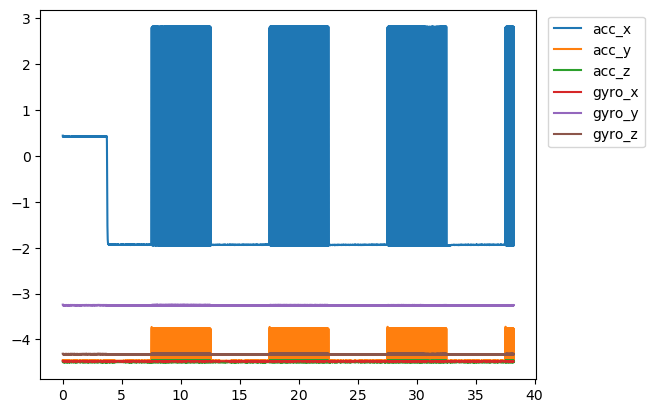

In [58]:
plt.plot(opto_ds['timestamps']-opto_ds['timestamps'][0],opto_ds['IMU_data'])
plt.legend(opto_ds['sample'].data,bbox_to_anchor=(1.01, 1))
plt.show()

In [78]:

expdate = '050721'
ani = 'PV'
find('*imu.nc',os.path.normpath(os.path.join(rootdir,'{}/'.format(expdate))))
for file in find('*imu.nc',os.path.normpath(os.path.join(rootdir,'{}/'.format(expdate)))):
    if 'PV' in file:
        if 'laser_on' in file:
            print(file)

T:\OptoPreyCapture\050721\PVCH12p10\trial_3\050721_PVCH12p10_laser_on_Rig2_trial_3_imu.nc
T:\OptoPreyCapture\050721\PVCH12p10\trial_4\050721_PVCH12p10_laser_on_Rig2_trial_4_imu.nc
T:\OptoPreyCapture\050721\PVCH12p11a\trial_3\050721_PVCH12p11a_laser_on_Rig2_trial_3_imu.nc
T:\OptoPreyCapture\050721\PVCH12p11a\trial_4\050721_PVCH12p11a_laser_on_Rig2_trial_4_imu.nc
T:\OptoPreyCapture\050721\PVCH12p11b\trial_3\050721_PVCH12p11b_laser_on_Rig2_trial_3_imu.nc
T:\OptoPreyCapture\050721\PVCH12p11b\trial_4\050721_PVCH12p11b_laser_on_Rig2_trial_4_imu.nc
T:\OptoPreyCapture\050721\PVCH13p3RT\trial_2\050721_PVCH13p3RT_laser_on_Rig2_trial_2_imu.nc
T:\OptoPreyCapture\050721\PVCH13p3RT\trial_3\050721_PVCH13p3RT_laser_on_Rig2_trial_3_imu.nc


In [183]:
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


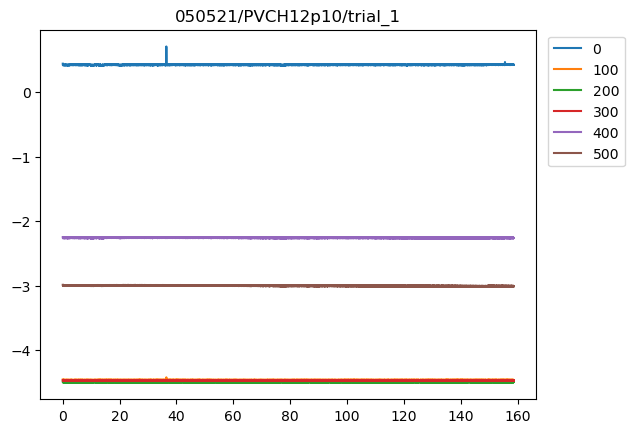

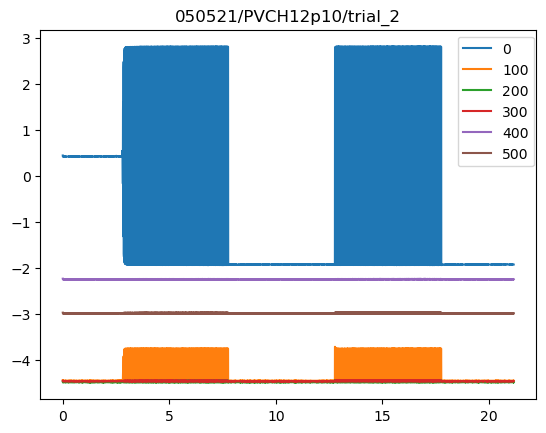

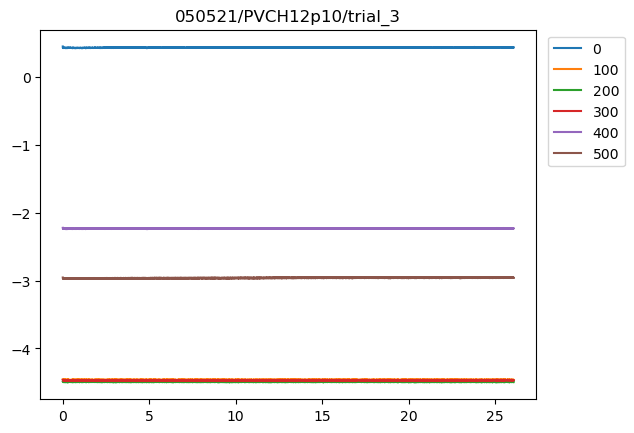

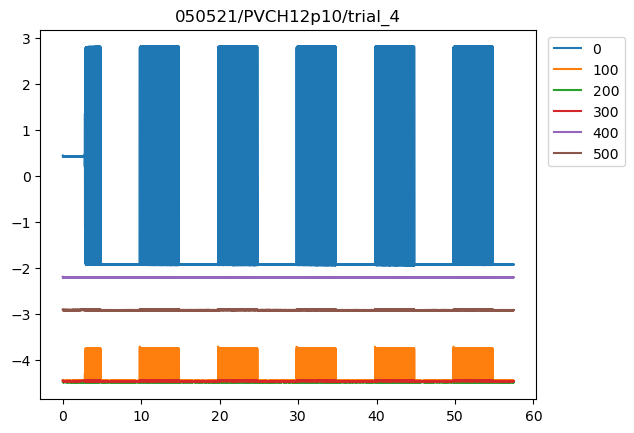

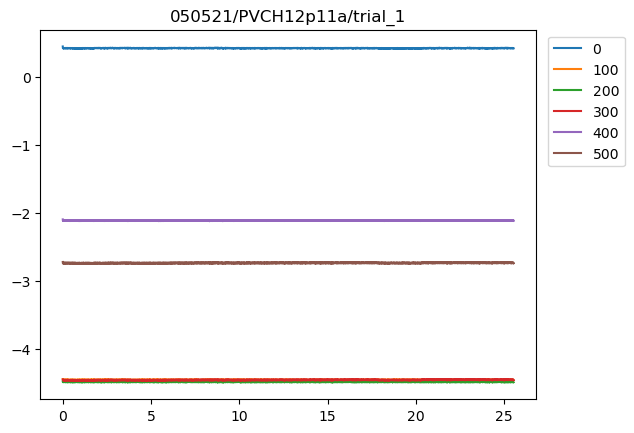

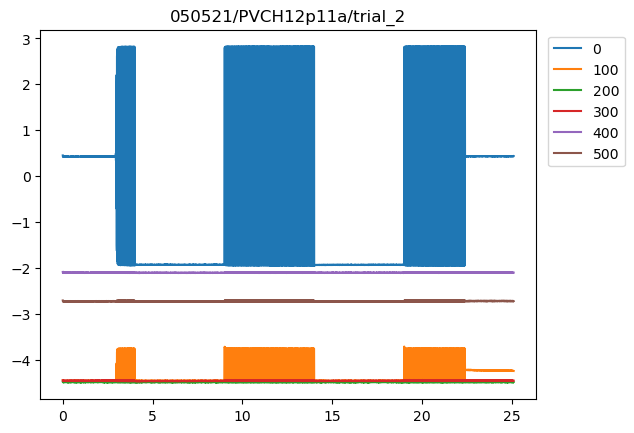

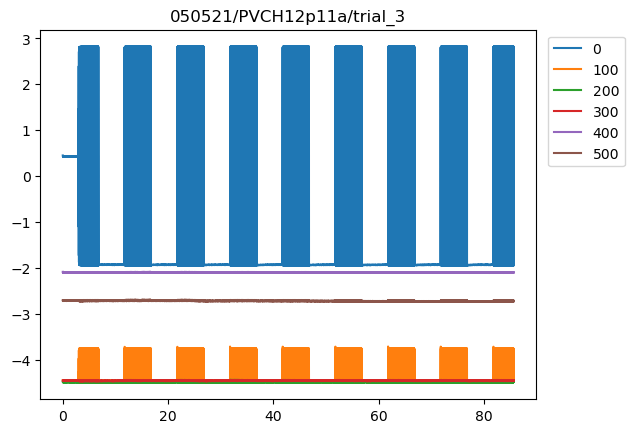

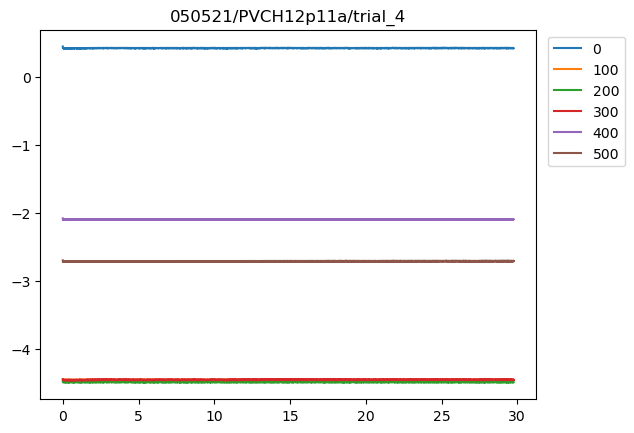

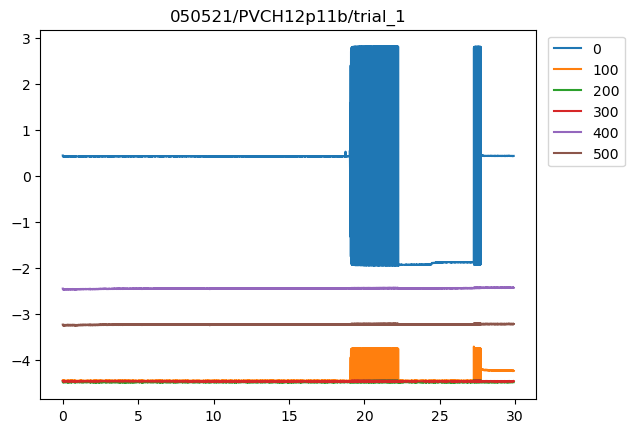

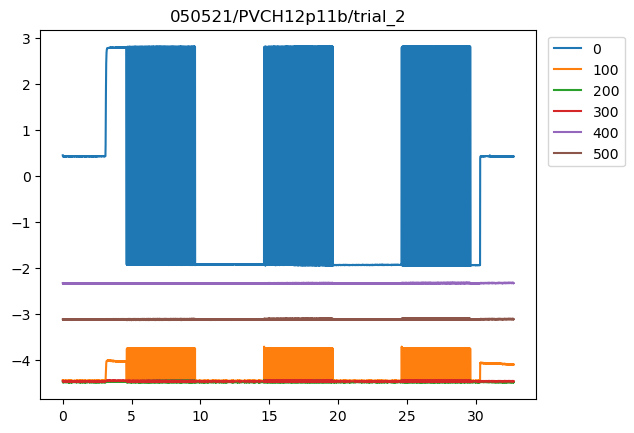

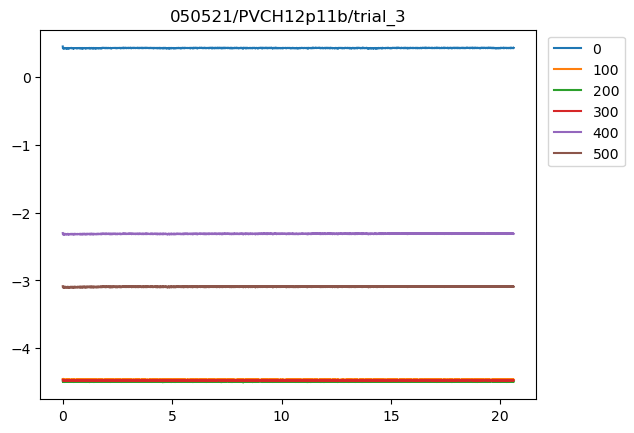

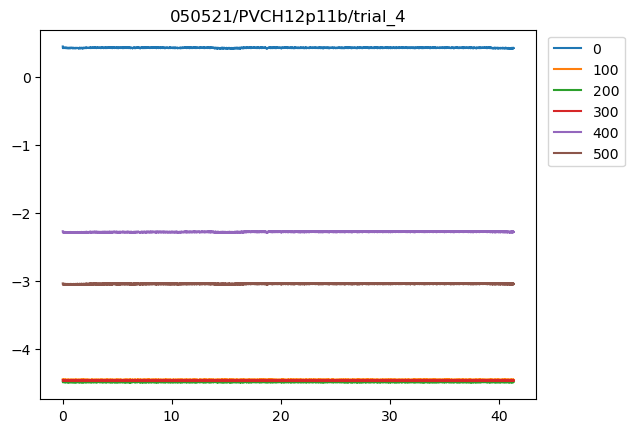

C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


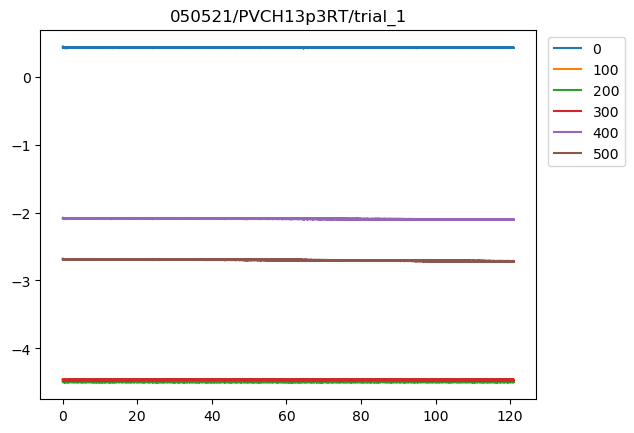

C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


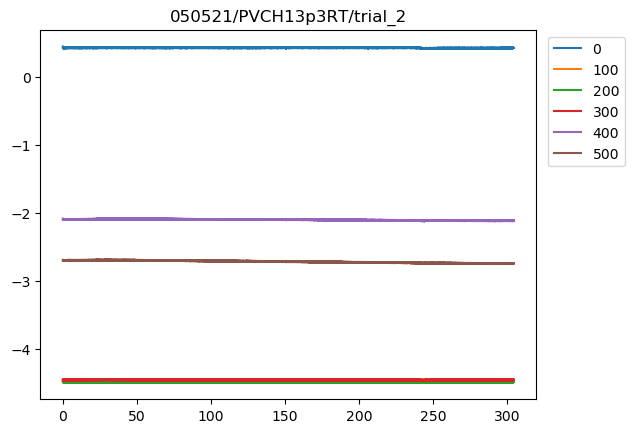

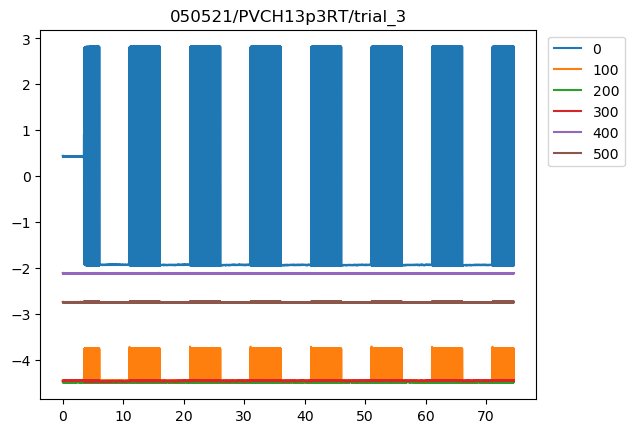

C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


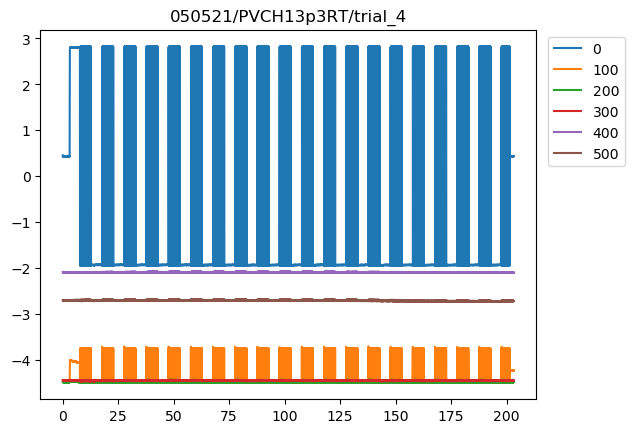

In [12]:
trial_list = [1,2,3,4]
expdate = '050521'
ani_list = ['PVCH12p10', 'PVCH12p11a', 'PVCH12p11b', 'PVCH13p3RT']
rootdir = os.path.normpath('T:/OptoPreyCapture/')
for ani in ani_list:
    for trial in trial_list:
        filedir = glob.glob(os.path.normpath(os.path.join(rootdir,'{}/{}/trial_{:d}'.format(expdate,ani,trial),'*imu.nc')))
        filepath = filedir[0]
        opto_ds = xr.open_dataset(filepath)
        plt.plot(opto_ds['timestamps']-opto_ds['timestamps'][0],opto_ds['IMU_data'])
        plt.legend(opto_ds['sample'].data,bbox_to_anchor=(1.01, 1))
        plt.title('{}/{}/trial_{:d}'.format(expdate,ani,trial))
        plt.show()

In [13]:
filepath

'T:\\OptoPreyCapture\\050521\\PVCH13p3RT\\trial_4\\050521_PVCH13p3RT_laser_on_Rig2_trial_4_imu.nc'

In [14]:
opto_ds = xr.open_dataset(filepath)

In [15]:
opto_ds

<xarray.Dataset>
Dimensions:     (channel: 6, sample: 60949)
Coordinates:
  * sample      (sample) int64 0 100 200 300 ... 6094500 6094600 6094700 6094800
  * channel     (channel) object 'acc_x' 'acc_y' 'acc_z' ... 'gyro_y' 'gyro_z'
    timestamps  (sample) float64 ...
Data variables:
    IMU_data    (sample, channel) float64 ...

In [16]:
1/np.diff((opto_ds['timestamps']))

array([299.99999994, 299.99999994, 299.99999994, ..., 299.99999994,
       299.99999994, 299.99999994])

C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


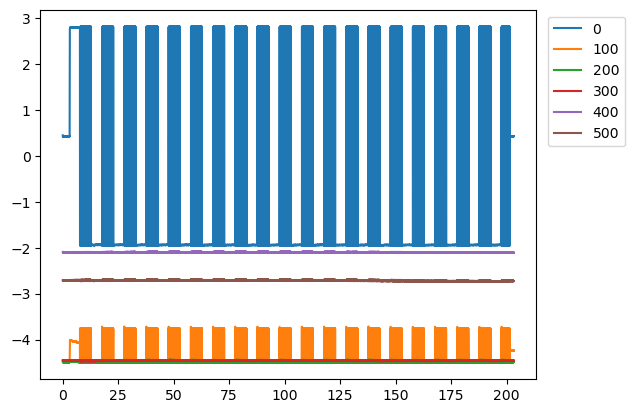

In [17]:
plt.plot(opto_ds['timestamps']-opto_ds['timestamps'][0],opto_ds['IMU_data'])
plt.legend(opto_ds['sample'].data,bbox_to_anchor=(1.01, 1))
plt.show()

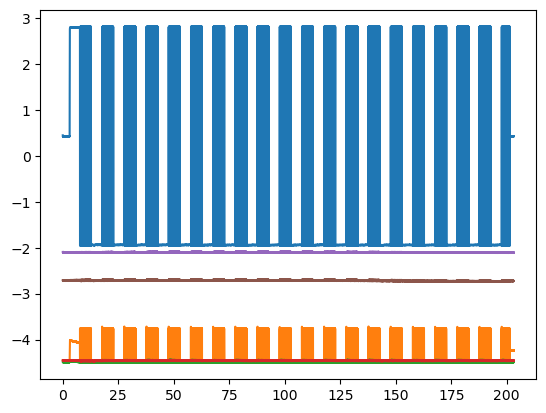

In [29]:
filtered=signal.medfilt(opto_ds['timestamps'], 31)
plt.plot(filtered-filtered[0], opto_ds['IMU_data'])
plt.show()

In [6]:
expdate = '050721'
ani = 'PV'
find('*imu.nc',os.path.normpath(os.path.join(rootdir,'{}/'.format(expdate))))
for file in find('*TOP1.nc',os.path.normpath(os.path.join(rootdir,'{}/'.format(expdate)))):
    if 'PV' in file:
        if 'laser_on' in file:
            print(file)

T:\OptoPreyCapture\050721\PVCH12p10\trial_3\050721_PVCH12p10_laser_on_Rig2_trial_3_TOP1.nc
T:\OptoPreyCapture\050721\PVCH12p10\trial_4\050721_PVCH12p10_laser_on_Rig2_trial_4_TOP1.nc
T:\OptoPreyCapture\050721\PVCH12p11a\trial_3\050721_PVCH12p11a_laser_on_Rig2_trial_3_TOP1.nc
T:\OptoPreyCapture\050721\PVCH12p11a\trial_4\050721_PVCH12p11a_laser_on_Rig2_trial_4_TOP1.nc
T:\OptoPreyCapture\050721\PVCH12p11b\trial_3\050721_PVCH12p11b_laser_on_Rig2_trial_3_TOP1.nc
T:\OptoPreyCapture\050721\PVCH12p11b\trial_4\050721_PVCH12p11b_laser_on_Rig2_trial_4_TOP1.nc
T:\OptoPreyCapture\050721\PVCH13p3RT\trial_2\050721_PVCH13p3RT_laser_on_Rig2_trial_2_TOP1.nc
T:\OptoPreyCapture\050721\PVCH13p3RT\trial_3\050721_PVCH13p3RT_laser_on_Rig2_trial_3_TOP1.nc


In [7]:
trial = 3
expdate = '050721'
ani = 'PVCH12p10'
rootdir = os.path.normpath('T:/OptoPreyCapture/')
filedir = glob.glob(os.path.normpath(os.path.join(rootdir,'{}/{}/trial_{:d}'.format(expdate,ani,trial),'*TOP1.nc')))
filepath = filedir[0]

In [8]:
filepath

'T:\\OptoPreyCapture\\050721\\PVCH12p10\\trial_3\\050721_PVCH12p10_laser_on_Rig2_trial_3_TOP1.nc'

In [9]:
top1= xr.open_dataset(filepath)

# Indexing into xarray

In [ ]:
top1['TOP1_pts'].point_loc

In [27]:
Lear_x = top1['TOP1_pts'].sel(point_loc='Lear_x').data
Lear_x

array([411.10070801, 411.17453003, 411.18026733, ..., 246.70783997,
       246.87800598, 247.23097229])

In [4]:
time=np.asarray(top1['timestamps'])

NameError: name 'top1' is not defined

In [12]:
time

array([63173.281907, 63173.298124, 63173.315059, ..., 63247.939059,
       63247.955404, 63247.969548])

In [13]:
tot_time=time[-1]-time[0]

In [14]:
tot_time

74.6876409999968

In [6]:
#loop through animals and calculate time to capture (right now this is just total video time, which is a bit off since it's not cropped by cricket_prob)
#at least an approximation to see if this tells us anything 
trial_list=[1,2,3,4]
ani_list=['PVCH12p10', 'PVCH12p11a', 'PVCH12p11b', 'PVCH13p3RT', 'CH2p4', 'CH2p10']
date_list= ['050321','050421','050521','050621','050721','051021', '051121', '051221', '051321', '051421']
time2capture_dict={}
for date in date_list:
    ani = 'PV'
    find('*TOP1.nc',os.path.normpath(os.path.join(rootdir,'{}/'.format(date))))
    for file in find('*TOP1.nc',os.path.normpath(os.path.join(rootdir,'{}/'.format(date)))):
        if 'PV' in file:
            if 'laser_on' in file:
                print(file)
                top1= xr.open_dataset(file)
                time=np.asarray(top1['timestamps'])
                tot_time=time[-1]-time[0]
                #print("laser time is {}".format(tot_time))
                #time2capture_dict[ani]=tot_time
            else:
                top1= xr.open_dataset(file)
                time=np.asarray(top1['timestamps'])
                tot_time=time[-1]-time[0]
#                 print("control time is {}".format(tot_time))
               
    

T:\OptoPreyCapture\050321\PVCH12p10\trial_1\050321_PVCH12p10_laser_on_Rig2_trial_1_TOP1.nc
T:\OptoPreyCapture\050321\PVCH12p10\trial_4\050321_PVCH12p10_laser_on_Rig2_trial_4_TOP1.nc
T:\OptoPreyCapture\050321\PVCH12p11a\trial_2\050321_PVCH12p11a_laser_on_Rig2_trial_2_TOP1.nc
T:\OptoPreyCapture\050321\PVCH12p11a\trial_4\050321_PVCH12p11a_laser_on_Rig2_trial_4_TOP1.nc
T:\OptoPreyCapture\050321\PVCH12p11b\trial_3\050321_PVCH12p11b_laser_on_Rig2_trial_3_TOP1.nc
T:\OptoPreyCapture\050321\PVCH12p11b\trial_4\050321_PVCH12p11b_laser_on_Rig2_trial_4_TOP1.nc
T:\OptoPreyCapture\050321\PVCH13p3RT\trial_1\050321_PVCH13p3RT_laser_on_Rig2_trial_1_TOP1.nc
T:\OptoPreyCapture\050321\PVCH13p3RT\trial_4\050321_PVCH13p3RT_laser_on_Rig2_trial_4_TOP1.nc
T:\OptoPreyCapture\050421\PVCH12p10\trial_2\050421_PVCH12p10_laser_on_Rig2_trial_2_TOP1.nc
T:\OptoPreyCapture\050421\PVCH12p10\trial_3\050421_PVCH12p10_laser_on_Rig2_trial_3_TOP1.nc
T:\OptoPreyCapture\050421\PVCH12p11a\trial_2\050421_PVCH12p11a_laser_on_Rig2_t

In [169]:
time2capture_dict

{'PV': 23.43973100000585}

In [176]:
test_array1=np.array(['PVCH12p10','PVCH12p10', 'PVCH12p11a','PVCH12p11a', 'PVCH12p11b','PVCH12p11b', 'PVCH13p3RT','PVCH13p3RT', 'CH2p4','CH2p4', 'CH2p10','CH2p10'])
test_array2=np.array(['control', 'laser_on','control', 'laser_on','control', 'laser_on','control', 'laser_on','control', 'laser_on','control', 'laser_on'])
test_arrays=[test_array1, test_array2]

In [177]:
test_arrays

[array(['PVCH12p10', 'PVCH12p10', 'PVCH12p11a', 'PVCH12p11a', 'PVCH12p11b',
        'PVCH12p11b', 'PVCH13p3RT', 'PVCH13p3RT', 'CH2p4', 'CH2p4',
        'CH2p10', 'CH2p10'], dtype='<U10'),
 array(['control', 'laser_on', 'control', 'laser_on', 'control',
        'laser_on', 'control', 'laser_on', 'control', 'laser_on',
        'control', 'laser_on'], dtype='<U8')]

In [179]:
test_df=pd.DataFrame(index=test_arrays)
test_df

Empty DataFrame
Columns: []
Index: [(PVCH12p10, control), (PVCH12p10, laser_on), (PVCH12p11a, control), (PVCH12p11a, laser_on), (PVCH12p11b, control), (PVCH12p11b, laser_on), (PVCH13p3RT, control), (PVCH13p3RT, laser_on), (CH2p4, control), (CH2p4, laser_on), (CH2p10, control), (CH2p10, laser_on)]

to read in DLC data and start to calculate geometric variables

big block of code that at one point should have all of the calculations 

T:\OptoPreyCapture
T:\OptoPreyCapture\050721\PVCH12p10\trial_3\050721_PVCH12p10_laser_on_Rig2_trial_3_TOP1.nc
[[28.77419202 28.78220236 28.80558303 ... 16.37979494 16.38045002
  16.40536499]
 [32.77659344 32.76108946 32.7087034  ... 28.82054927 28.81707448
  28.79930483]]
[0.0000000e+00 1.6217000e-02 3.3152000e-02 ... 7.4657152e+01 7.4673497e+01
 7.4687641e+01]
[       nan        nan        nan ... 0.00704277 0.00352138 0.        ]


C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: invalid value encountered in remainder


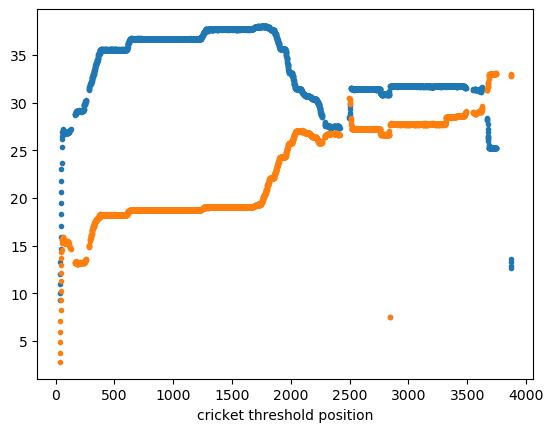

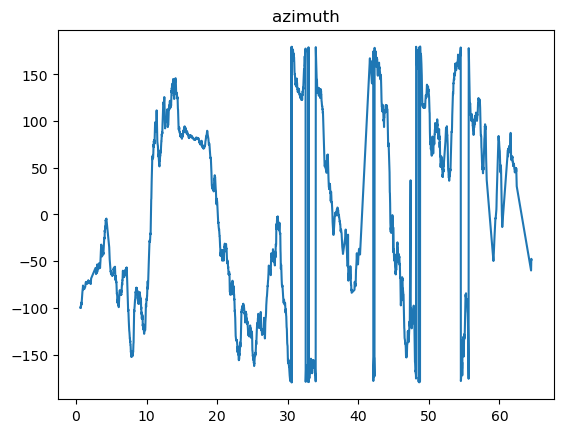

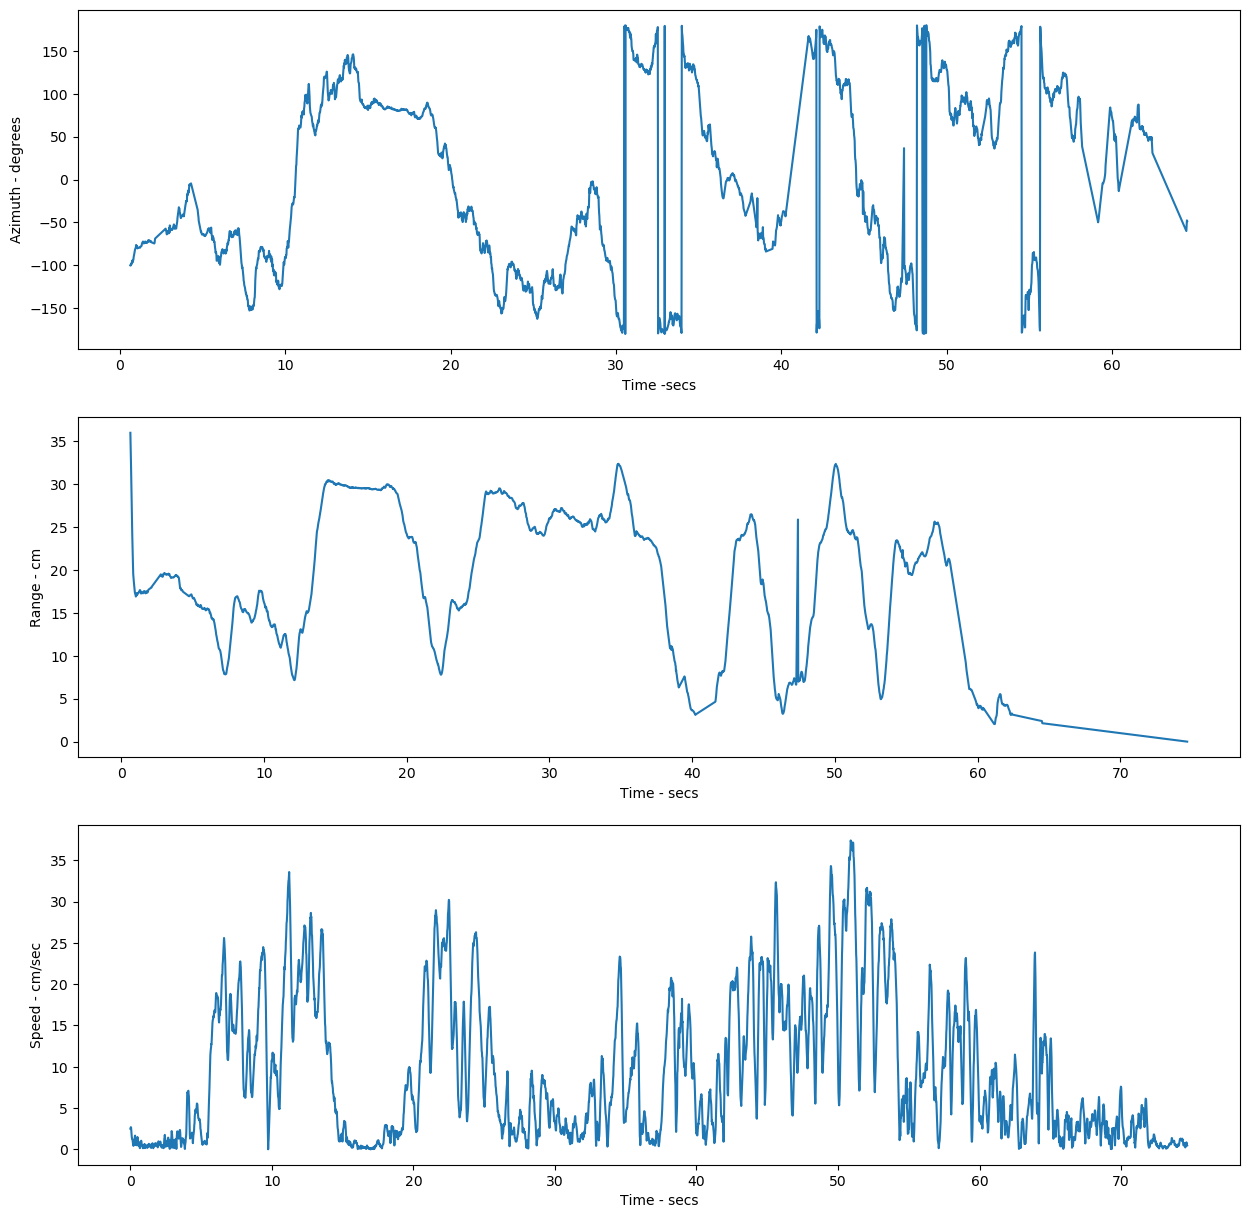

[23.883681   12.60249626 18.88656621 11.94572515  3.34704363  0.        ]
[0, 0, 0, 0, 1, 1]
0.3333333333333333
0.5
T:\OptoPreyCapture\050721\PVCH12p10\trial_4\050721_PVCH12p10_laser_on_Rig2_trial_4_TOP1.nc
[[33.91667859 34.10377871 34.26417278 ... 16.25221621 16.26252641
  16.28417916]
 [32.49014387 32.49415536 32.48758461 ...  4.22545269  4.23484881
   4.26980893]]
[0.0000000e+00 1.5450000e-02 3.1808000e-02 ... 3.6877466e+01 3.6894221e+01
 3.6911206e+01]
[       nan        nan        nan ... 0.00481256 0.00240628 0.        ]


C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: invalid value encountered in remainder


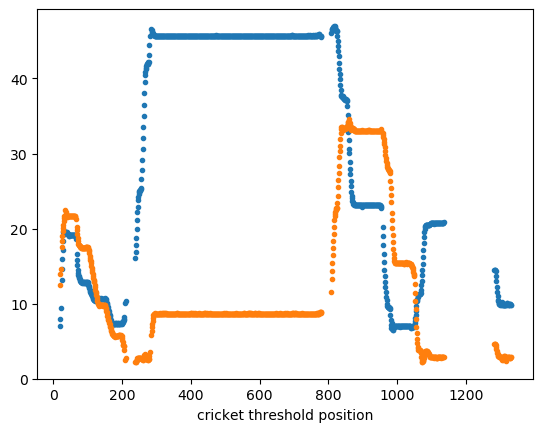

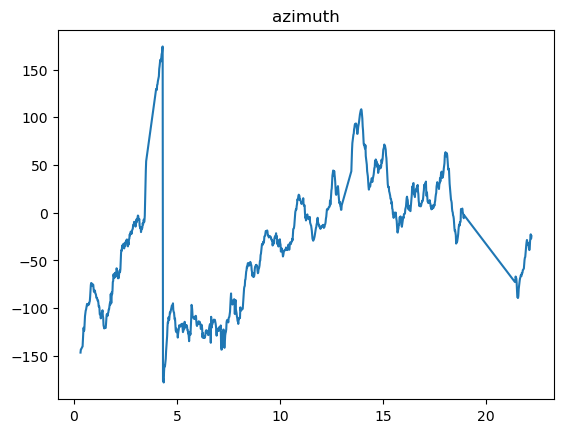

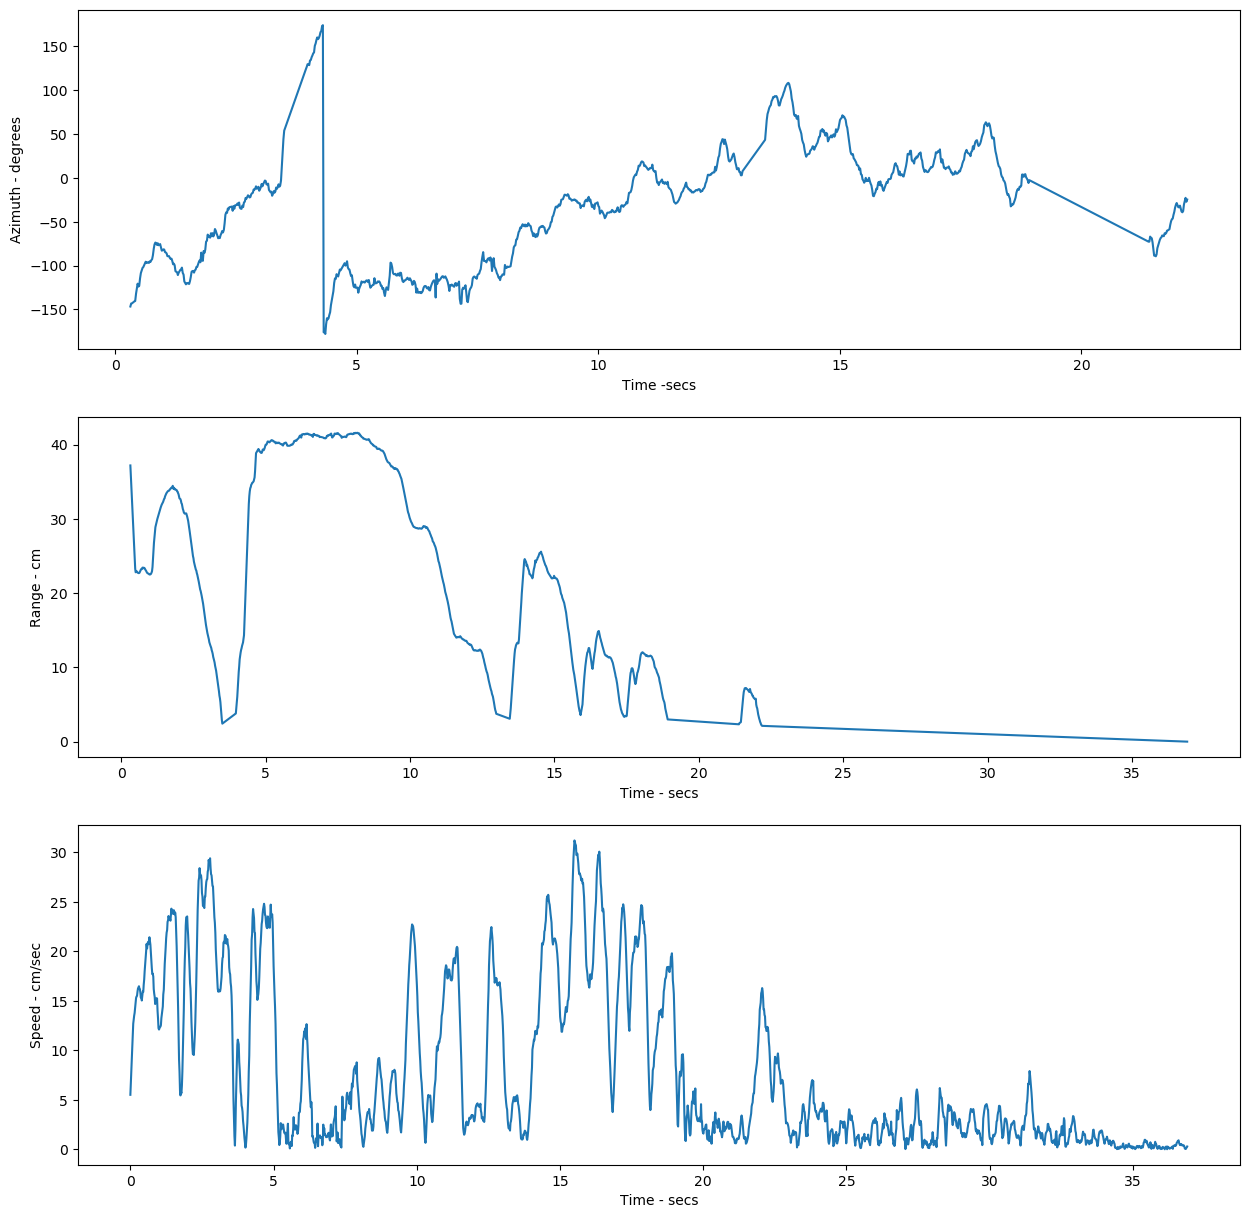

[ 3.72403941 32.82633166 14.12155144  3.58170857  9.84014506  0.        ]
[1, 0, 0, 1, 0, 1]
0.5
0.3333333333333333
T:\OptoPreyCapture\050721\PVCH12p11a\trial_3\050721_PVCH12p11a_laser_on_Rig2_trial_3_TOP1.nc
[[ 7.61202819  7.68231648  7.70891597 ...  8.10463557  8.10753132
   8.1333363 ]
 [13.74268736 13.69748241 13.63610524 ...  6.36777417  6.34135832
   6.2939098 ]]
[0.00000000e+00 1.66150000e-02 3.32680000e-02 ... 2.80858612e+02
 2.80875226e+02 2.80884326e+02]
[       nan        nan        nan ... 0.20979584 0.10489792 0.        ]


C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: invalid value encountered in remainder


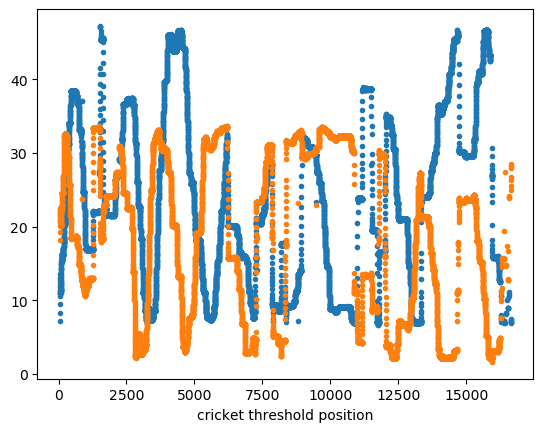

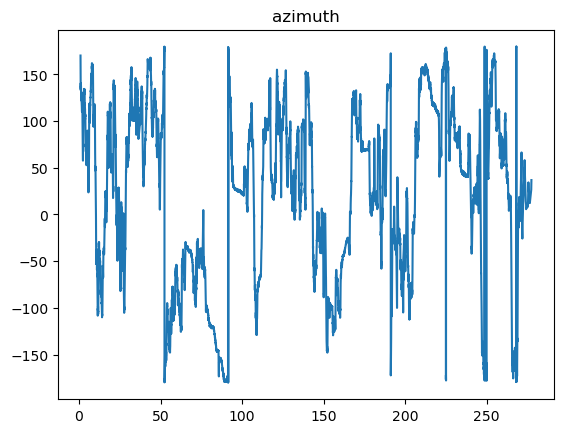

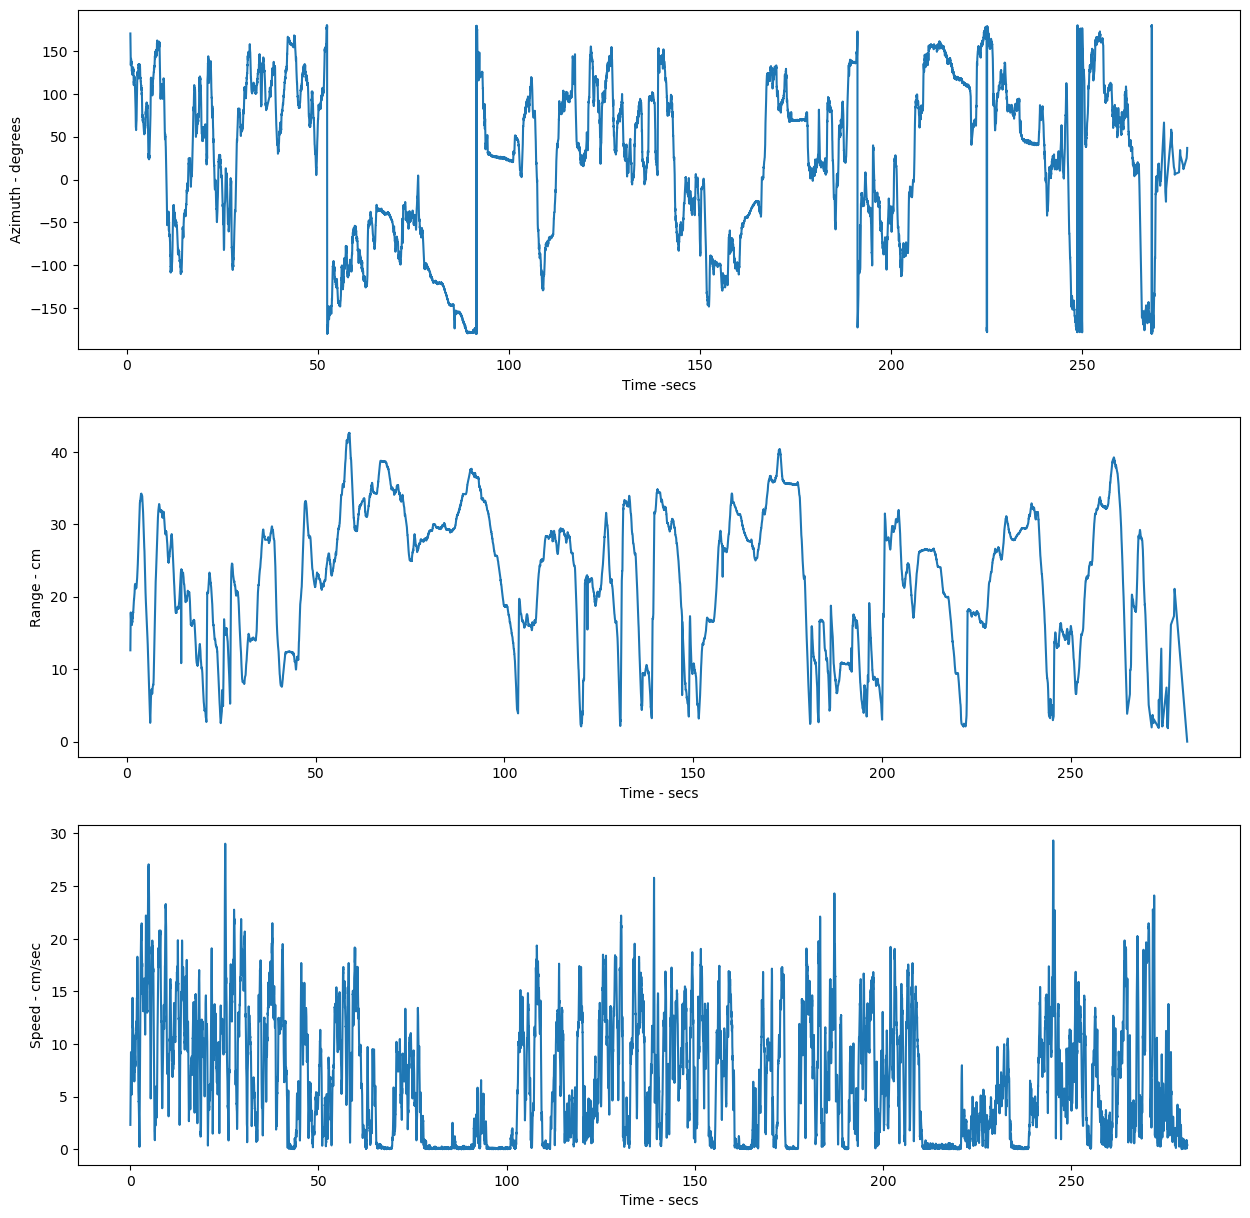

[16.19935098 14.16873424  3.96696462  5.23547137  4.10212561 28.97916186
  3.60813479  4.23544306  4.35623865  3.61373367 10.27245187  6.59236967
  9.59940439  5.21093583  2.44195689 11.73139329  2.67298028 12.42956317
  4.64721096 10.78158504 15.00517714 27.93873728 21.94060035  3.44603463
  3.33034333  4.39734506  3.77563675  2.903499    2.39386951  0.        ]
[0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
0.5333333333333333
0.0625
T:\OptoPreyCapture\050721\PVCH12p11a\trial_4\050721_PVCH12p11a_laser_on_Rig2_trial_4_TOP1.nc
[[43.95034053 43.86214263 43.79658035 ...  8.36446775  8.37356304
   8.40798713]
 [16.5411419  16.60111158 16.61144599 ...  8.86974387  8.95319866
   8.68974173]]
[0.00000000e+00 1.70110000e-02 3.64420000e-02 ... 3.03949261e+02
 3.03965850e+02 3.03979904e+02]
[20.30597511 20.32578031 20.31195423 ... 43.88681916 43.83226879
  0.        ]


C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: invalid value encountered in remainder


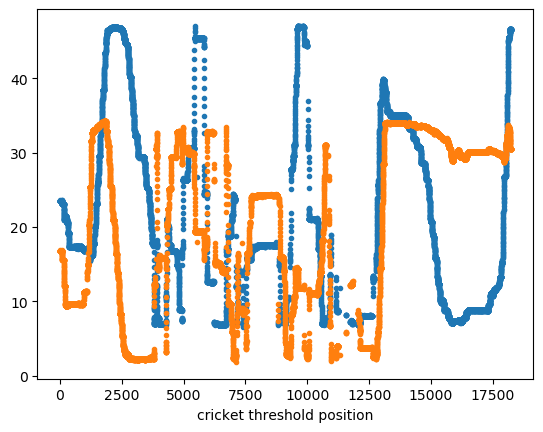

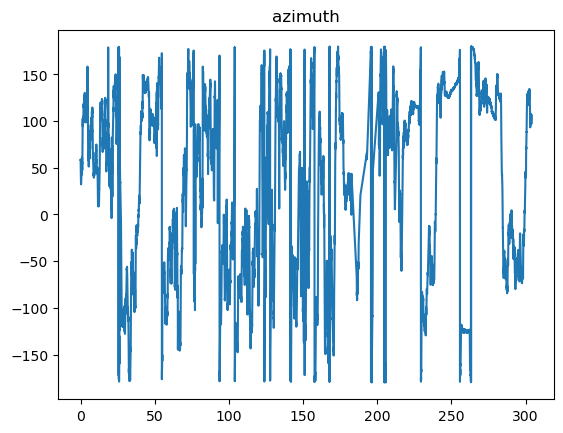

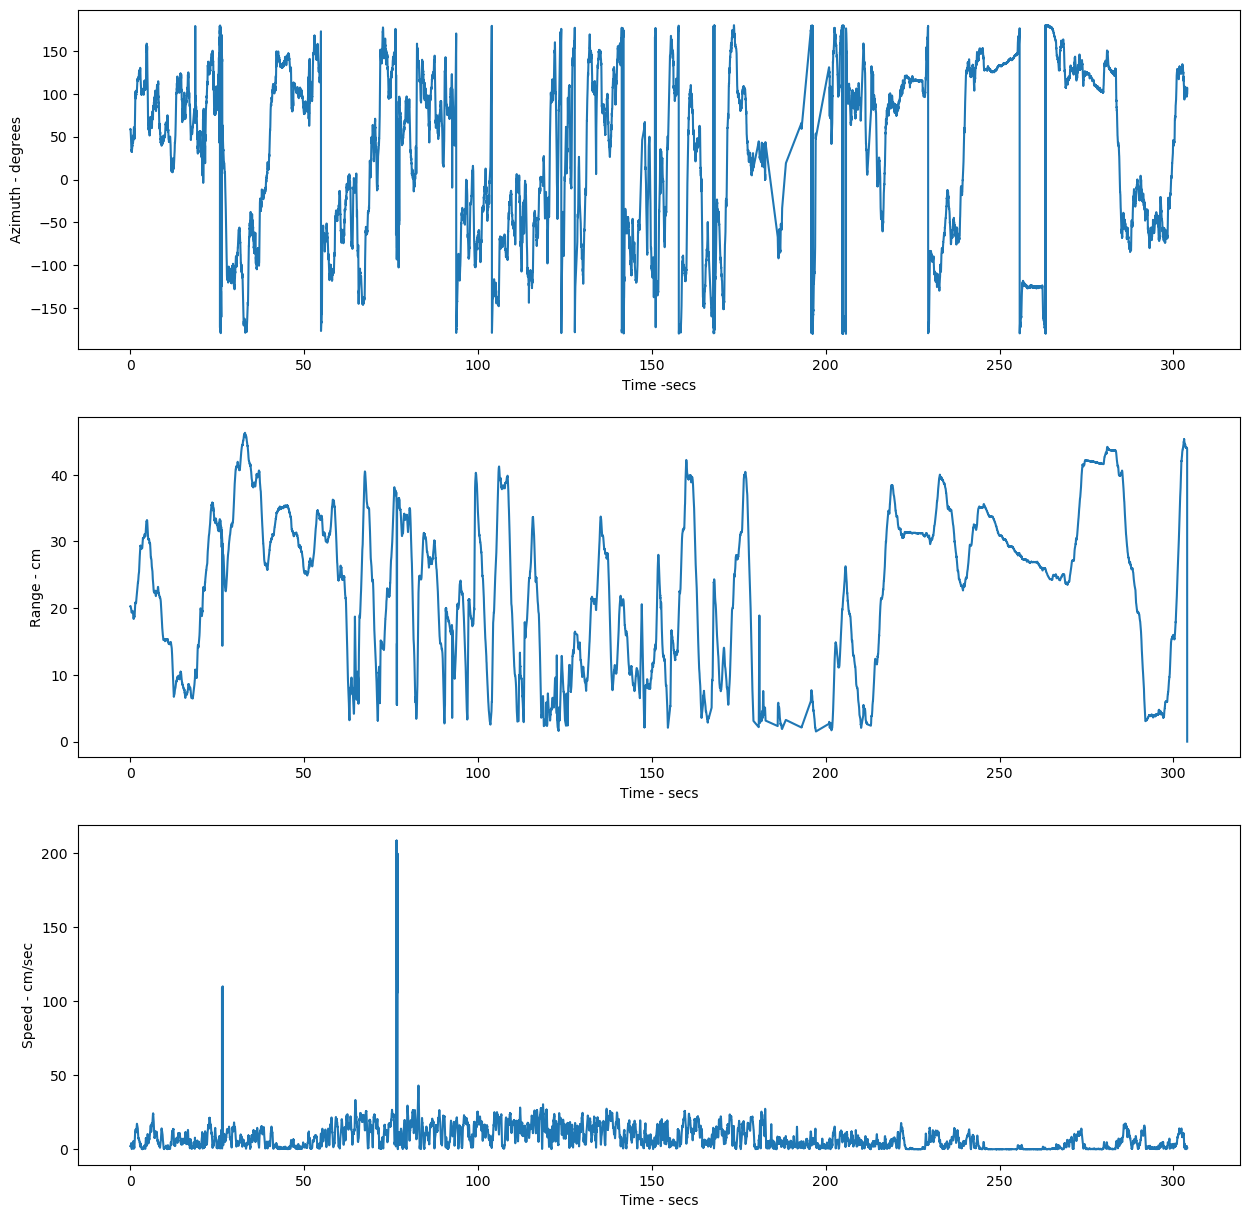

[ 6.7299534  22.58515991 26.61625143  7.96126005  6.74108519 26.8868443
  7.24578875  5.90927012  5.50306546  3.35352576 10.55191144  3.01205545
 20.32992302 12.25966415 17.20455538  4.78630335  2.85181884  8.4285266
 14.32461521 16.32395499  8.3836435  12.80022002  3.95383925  8.00557635
  2.97832357  3.52714529  3.82096691  3.59723204  2.75726071  3.18114123
 12.70552905 19.94131352  0.        ]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1]
0.36363636363636365
0.08333333333333333
T:\OptoPreyCapture\050721\PVCH12p11b\trial_3\050721_PVCH12p11b_laser_on_Rig2_trial_3_TOP1.nc
[[ 8.92901901  8.91530346  8.91975903 ...  7.67478101  7.68100739
   7.6778717 ]
 [30.60819429 30.59425512 30.59336274 ... 27.76650159 27.76944391
  27.77111395]]
[0.00000000e+00 1.66650000e-02 3.34460000e-02 ... 3.01215065e+02
 3.01231808e+02 3.01247360e+02]
[        nan         nan         nan ... 19.89581864 19.89548971
  0.        ]


C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: invalid value encountered in remainder


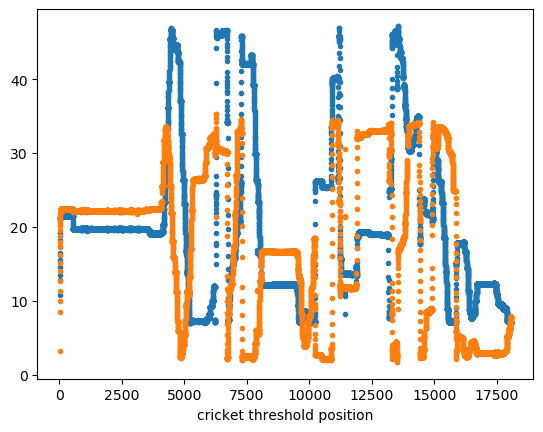

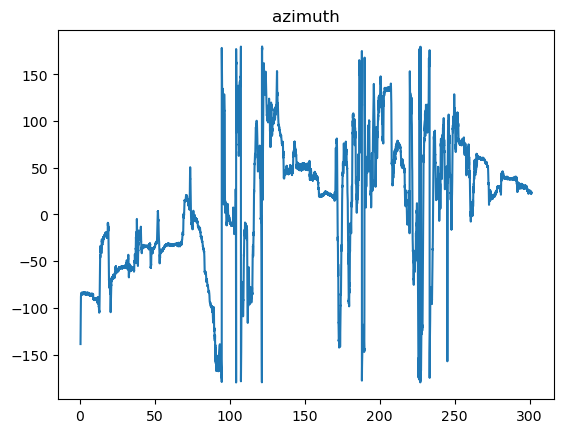

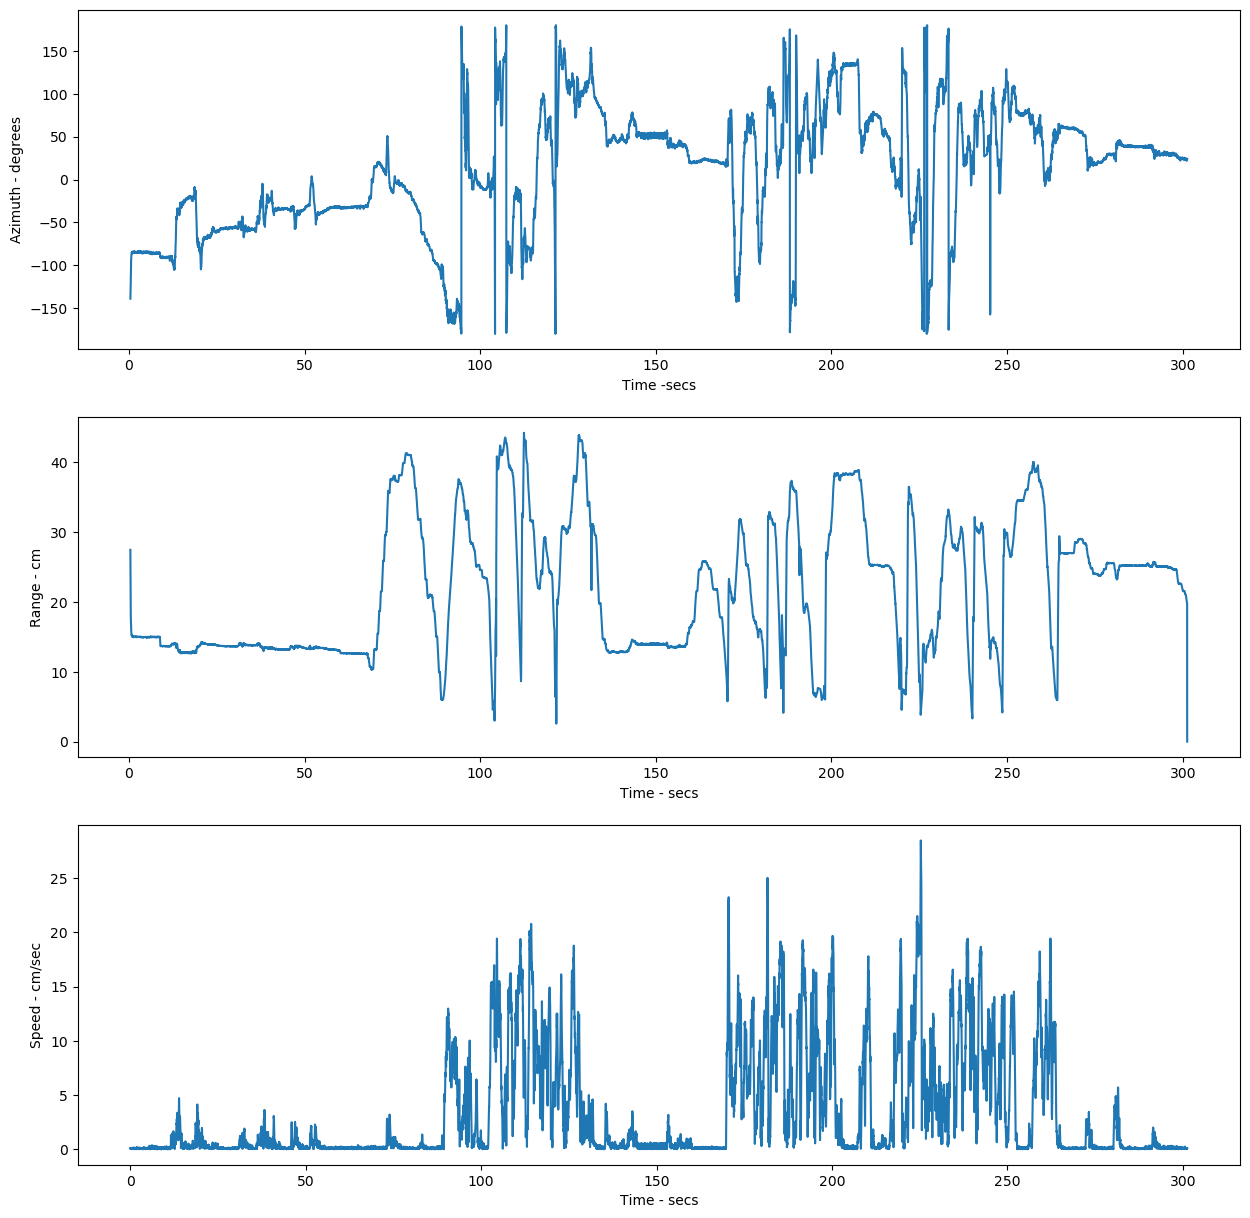

[29.14951763  3.43475239  8.65282244 22.42882749 19.27138058  6.57606717
 28.87239003  7.84752004  9.62435206  8.97882822  4.55508657  7.41781664
 12.41387056 27.59696722 16.70952013 17.62911723 21.68590937  7.97394349
  0.        ]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
0.15789473684210525
0.3333333333333333
T:\OptoPreyCapture\050721\PVCH12p11b\trial_4\050721_PVCH12p11b_laser_on_Rig2_trial_4_TOP1.nc
[[ 9.02185085  9.03924639  9.04981863 ... 22.31021644 21.75771042
  21.33047275]
 [ 4.96595422  5.02687336  4.94974505 ...  3.39533299  3.47834567
   3.5550224 ]]
[0.00000000e+00 1.64480000e-02 3.37540000e-02 ... 2.46596979e+02
 2.46613683e+02 2.46629209e+02]
[       nan        nan        nan ... 0.17529506 0.08764753 0.        ]


C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: invalid value encountered in remainder


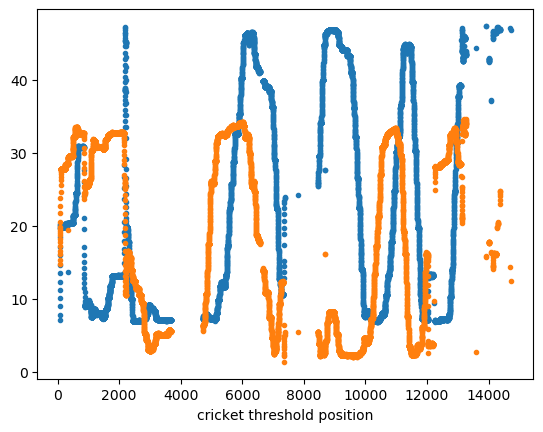

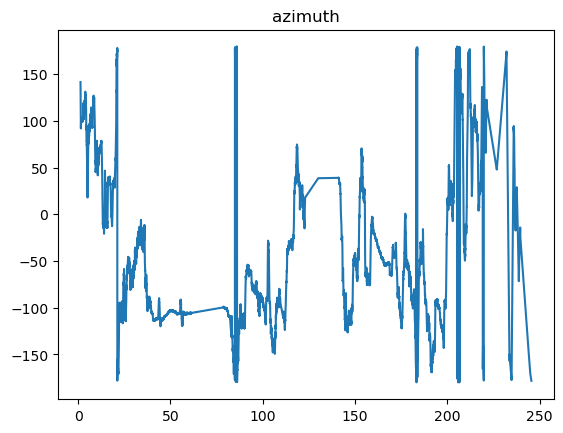

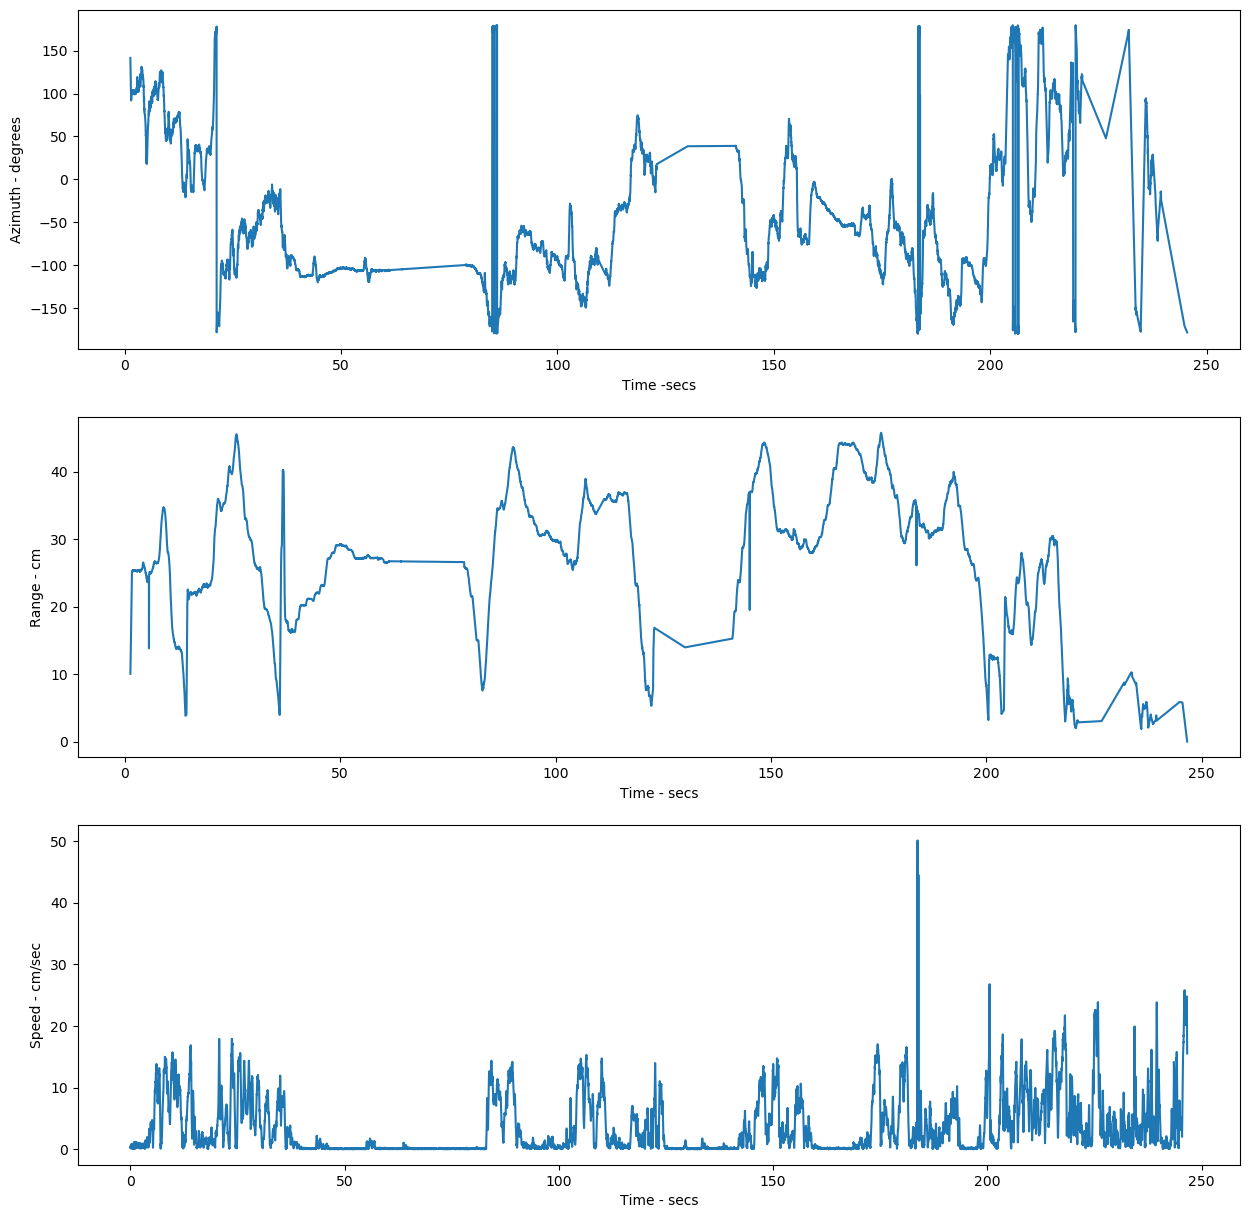

[ 4.00698883  9.0887889   6.77345234 32.0066932   7.59300709 16.31374451
 31.15817935 11.12799943  4.14301016 22.15148217 14.49384262  8.18547102
  2.63221137  0.        ]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
0.2857142857142857
0.25
T:\OptoPreyCapture\050721\PVCH13p3RT\trial_2\050721_PVCH13p3RT_laser_on_Rig2_trial_2_TOP1.nc
[[43.40948697 43.40163237 43.38927381 ... 11.78123579 11.76986642
  11.72654672]
 [14.66454131 14.70159649 14.69784651 ...  6.44189322  6.44260643
   6.45041999]]
[0.00000000e+00 1.67040000e-02 4.03460000e-02 ... 1.57651700e+02
 1.57668352e+02 1.57684454e+02]
[       nan        nan        nan ... 0.02811607 0.01405804 0.        ]


C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: invalid value encountered in remainder


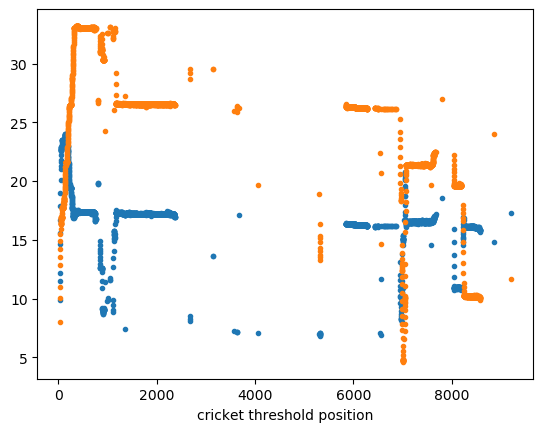

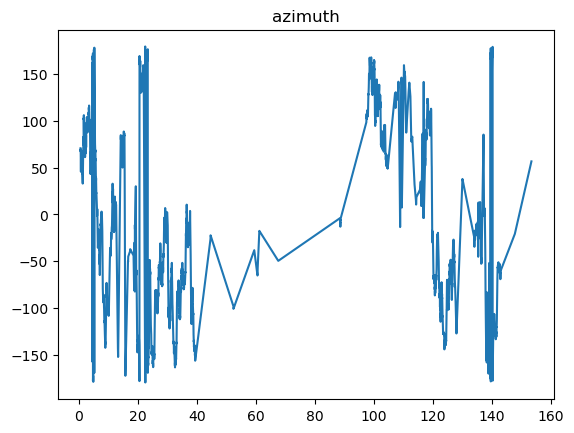

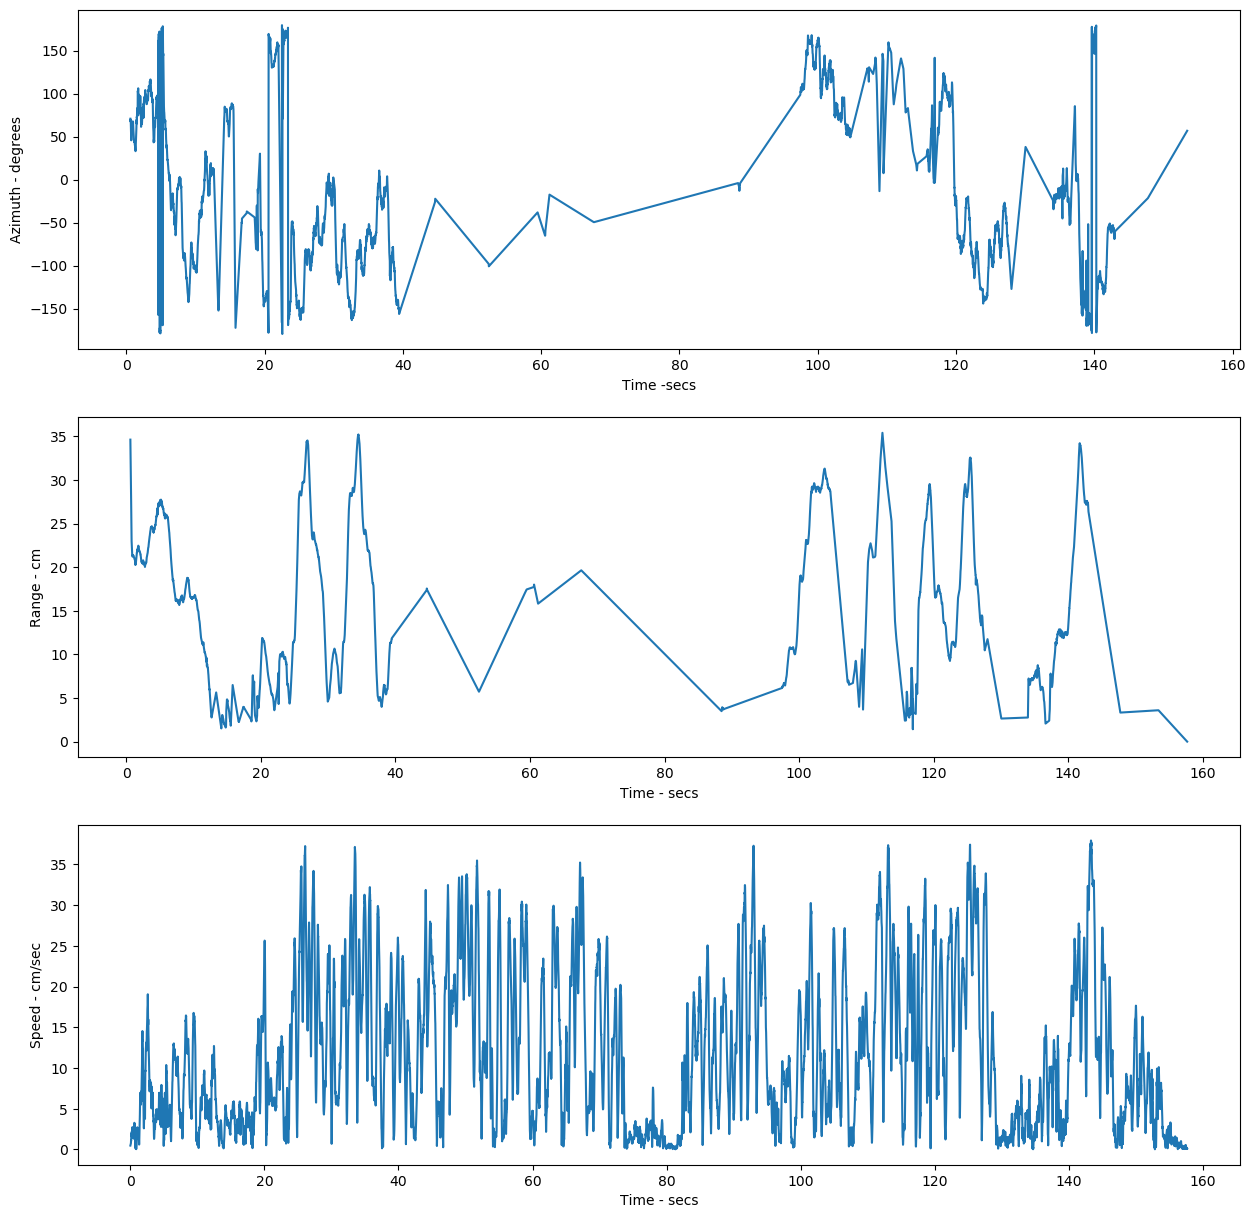

[20.62952393 11.23535988  3.33207604  2.43164415  4.83901371  5.20439872
 16.25793301 17.31070303  4.17978892  4.52941316  5.70075506  6.73444381
  2.92719065  3.30891665 19.20920421  5.97975675  6.81544735  0.        ]
[0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1]
0.4444444444444444
0.125
T:\OptoPreyCapture\050721\PVCH13p3RT\trial_3\050721_PVCH13p3RT_laser_on_Rig2_trial_3_TOP1.nc
[[43.87891256 43.87974811 43.85581181 ... 44.01110629 44.0356298
  43.99630632]
 [32.31705869 32.33364132 32.33827999 ...  4.50607721  4.50025848
   4.49926403]]
[0.0000000e+00 1.6679000e-02 3.4048000e-02 ... 5.3634112e+01 5.3650778e+01
 5.3662528e+01]
[       nan        nan        nan ... 0.06688277 0.03344139 0.        ]


C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: invalid value encountered in remainder


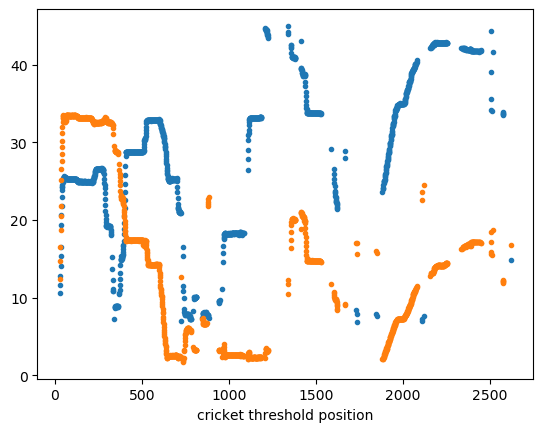

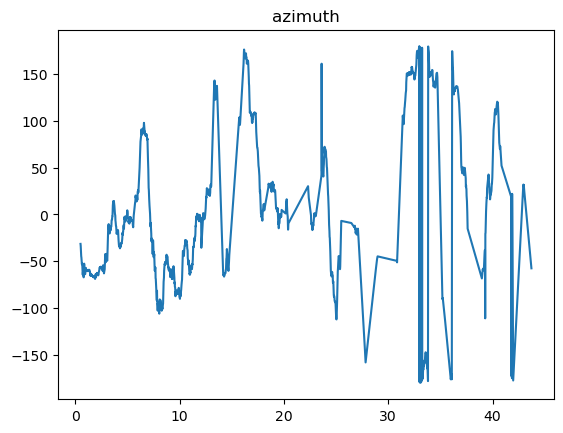

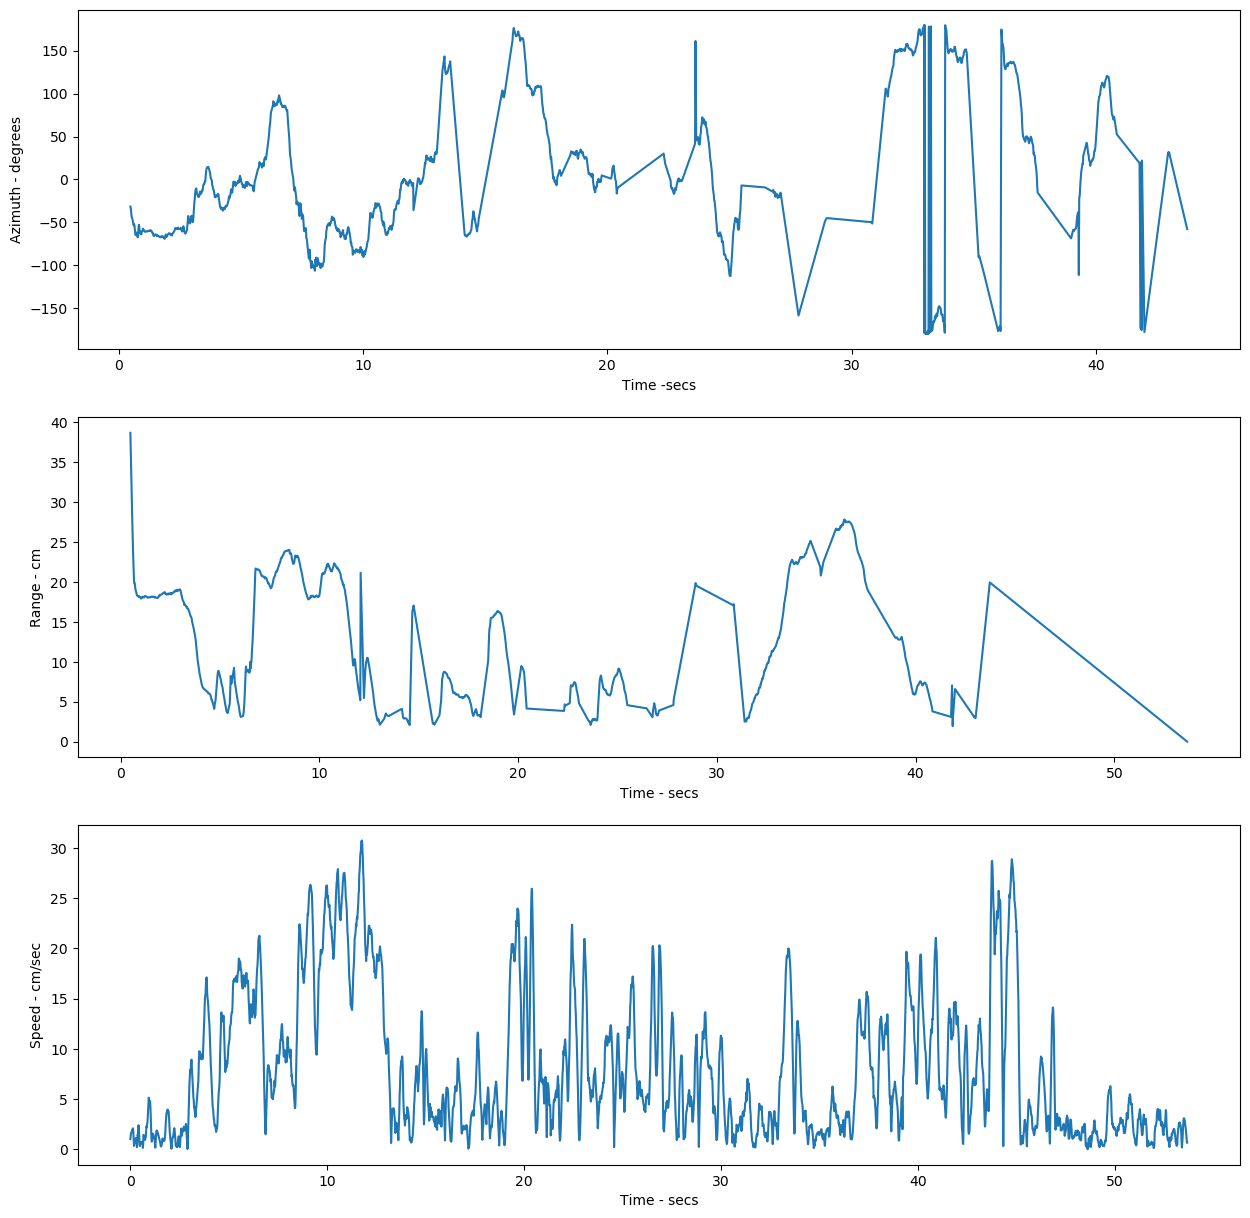

[ 6.74160575  3.11075871 20.0312098   2.61113613  4.02471889  3.21396304
  3.32803342 18.0012847   7.38888887  7.04508198  0.        ]
[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1]
0.5454545454545454
0.16666666666666666


In [506]:

#define parameters
pixpercm = 14.5
framerate = 60
thresh = 0.99  #cmn - changed from 0.9 to 0.99
# crick_thresh = 0.5
plotter=0

#defines the overall directory
rootdir = os.path.normpath('T:/OptoPreyCapture/')
print(rootdir)
#defines the path for a list of files
expdate = '050721'
ani = 'PV'
pv_on=[]
pv_off=[]
cont_on=[]
cont_off=[]
find('*TOP1.nc',os.path.normpath(os.path.join(rootdir,'{}/'.format(expdate))))
for file in find('*TOP1.nc',os.path.normpath(os.path.join(rootdir,'{}/'.format(expdate)))):
    if 'PV' in file:
        if 'laser_on' in file:
            pv_on.append(file)
#         else:
#             pv_off.append(file)
#     else:
#         if 'laser_on' in file:
#             cont_on.append(file)
#         else:
#             cont_off.append(file)
filelist=pv_on


#create some empty stuff
timetocap=[]
spdall=[]
distall=[]
azall=[]
inter_prob=[]
cap_prob=[]


#load the data that you want from each file into accessible form 
for f in filelist:
    data=xr.open_dataset(f)
    print(f)
    Cricket_p=data['TOP1_pts'].sel(point_loc='Cricket1_likelihood').data
    
    Rear_x = data['TOP1_pts'].sel(point_loc='Rear_x').data/pixpercm
    Rear_y = data['TOP1_pts'].sel(point_loc='Rear_y').data/pixpercm
    Rear_xy=np.asarray([Rear_x, Rear_y])
#     Rear_p=data['TOP1_pts'].sel(point_loc='Rear_likelihood').data
    
    Lear_x = data['TOP1_pts'].sel(point_loc='Lear_x').data/pixpercm
    Lear_y = data['TOP1_pts'].sel(point_loc='Lear_y').data/pixpercm
    Lear_xy=np.asarray([Lear_x, Lear_y])
#     Lear_p=data['TOP1_pts'].sel(point_loc='Lear_likelihood').data
    
    mouse_xy=0.5*(Rear_xy+Lear_xy)
    print(mouse_xy)
    
    Cricket_x = (data['TOP1_pts'].sel(point_loc='Cricket1_x').data+data['TOP1_pts'].sel(point_loc='Cricket2_x').data)/2
    Cricket_y = (data['TOP1_pts'].sel(point_loc='Cricket1_y').data+data['TOP1_pts'].sel(point_loc='Cricket2_y').data)/2
    
    Cricket_x=Cricket_x/pixpercm
    Cricket_y=Cricket_y/pixpercm
    
    crick_x_thresh = Cricket_x.copy()
    crick_x_thresh[Cricket_p < thresh] = np.nan


    crick_y_thresh = Cricket_y.copy()
    crick_y_thresh[Cricket_p < thresh] = np.nan
    
    plt.figure()
    plt.plot(crick_x_thresh,'.')
    plt.plot(crick_y_thresh,'.')
    plt.xlabel('cricket threshold position')
    
    Cricket_xy=[crick_x_thresh, crick_y_thresh]

#interpolate values to fill NaNs
    ind = np.arange(0,len(crick_x_thresh))
    interp = interpolate.interp1d(ind[~np.isnan(crick_x_thresh)], crick_x_thresh[~np.isnan(crick_x_thresh)],bounds_error=False, fill_value=np.nan )
    cricket_x_interp = interp(ind)

    ind = np.arange(0,len(crick_y_thresh))
    interp = interpolate.interp1d(ind[~np.isnan(crick_y_thresh)], crick_y_thresh[~np.isnan(crick_y_thresh)],bounds_error=False, fill_value=np.nan)
    cricket_y_interp = interp(ind)
    
#plot trajectories of mouse and cricket
    if plotter==1:
        plt.figure()
        plt.plot(mouse_xy[0], mouse_xy[1], alpha=0.75)
        plt.plot(cricket_x_interp, cricket_y_interp, alpha=0.75)
        plt.scatter(cricket_x_interp[0], cricket_y_interp[0], color='g')
        plt.scatter(cricket_x_interp[-1], cricket_y_interp[-1], color='r')
        plt.scatter(mouse_xy[0][0], mouse_xy[1][0], color='g')
        plt.scatter(mouse_xy[0][-1], mouse_xy[1][-1], color='r')
        plt.title('{}'.format(f))
#         plt.show()
#calculate time to capture
    Cricket_xy=[crick_x_thresh, crick_y_thresh]
    Cricket_xy
    #currently not the best, think there is a tradeoff between having the thresh low enough that speed and range look better and getting the exact time to capture
    captureT= np.max(np.where(~np.isnan(Cricket_xy[0])))/framerate
    movieT=len(Cricket_p)/framerate
    if captureT.size==0:
        captureT=movieT
    timetocap.append(captureT)
#calculate and plot distance between mouse and cricket
    timestamps=np.asarray(data['timestamps'])
    t = timestamps-timestamps[0]
    print(t)
    dist = np.sqrt( np.square(crick_x_thresh- mouse_xy[0]) + np.square(crick_y_thresh - mouse_xy[1])) #cmn - changes to cricket_x instead of interp.
    dist[-1]=0  # we know that last point should be 0 range, since it's capture
    
    ind = np.arange(0,len(dist))
    interp = interpolate.interp1d(ind[~np.isnan(dist)], dist[~np.isnan(dist)],bounds_error=False, fill_value=np.nan )
    range_interp = interp(ind)
    dist=range_interp
    print(dist)
    distall.append(dist)
    if plotter==1:
        plt.figure()
        plt.plot(t, dist)
        plt.title('Mouse Distance to Cricket')
        plt.xlabel('Time - secs')
        plt.ylabel('Distance - cm')
        plt.show()
        
#calculate mouse speed
    win = 12
    dx=np.diff(mouse_xy[0])
    dx=np.convolve(dx,np.ones(win)/win, 'same')

    dy=np.diff(mouse_xy[1])
    dy=np.convolve(dy,np.ones(win)/win, 'same')

    spd=(np.sqrt(np.square(dx)+np.square(dy)))*framerate
    spdall.append(spd)
    if plotter ==1:
        plt.plot(t[0:-1],spd)
        plt.title('Mouse Speed')
        plt.xlabel('Time - secs')
        plt.ylabel('Speed - cm/sec')
        plt.show()

#calculate azimuth 
    mouse_az = np.arctan2((Cricket_xy[1] - mouse_xy[1]),(Cricket_xy[0] - mouse_xy[0]))*180/np.pi

    head_az = np.arctan2((Rear_xy[1] - Lear_xy[1]),(Rear_xy[0] - Lear_xy[0]))*180/np.pi -90

    az = mouse_az-head_az
    az = np.mod(az+180,360)-180

    if np.sum(~np.isnan(az))>0:
        azOld = az
        ind = np.arange(0,len(az))
        interp = interpolate.interp1d(ind[~np.isnan(az)], az[~np.isnan(az)],bounds_error=False, fill_value=np.nan )
        az=interp(ind)
    azall.append(az)
    plt.figure()
    plt.plot( t,az)
    plt.title('azimuth')
#plot range, azimuth and speed on the same plot
    fig  = plt.figure(figsize = [15,15])
    ax = fig.add_subplot(311)
    ax1 = fig.add_subplot(312)
    ax2=fig.add_subplot(313)
    ax.plot(t, az)
    ax.set_ylabel('Azimuth - degrees')
    ax.set_xlabel('Time -secs')
    ax1.plot(t, dist)
    ax1.set_ylabel('Range - cm')
    ax1.set_xlabel('Time - secs')
    ax2.plot(t[0:-1], spd)
    ax2.set_ylabel('Speed - cm/sec')
    ax2.set_xlabel('Time - secs')
    plt.show()
#find the start and end of each approach
    approach = []
    paired = list(zip(az,spd))
    for pair in paired:
        if np.abs(pair[0]) < 30 and pair[1] > 5:
            approach.append(1)
        else:
            approach.append(0)

    approach=signal.medfilt(approach, 31)

    approach=np.asarray(approach)

    approachStarts=np.where(np.diff(approach)>0)
    approachEnds=np.where(np.diff(approach)<0)
    firstApproach=np.min(approachStarts)
    timetoapproach=t[firstApproach]
    timetoapproach=t[firstApproach]
    print(timetoapproach)
    freqapproach=np.size(approachStarts)/movieT
    print(freqapproach)
#find instances of intercept given an approach (end of approach range <2cm); index dist using approachEnds, if range value <2, then call an intercept
    intercept=[]
    maybeIntercept=np.take(dist, approachEnds)
    maybeIntercept=maybeIntercept[0]
    maybeIntercept[-1]=0 #assuming last approach is intercept/capture
    for i in maybeIntercept:
        if i<5:
            intercept.append(1)
        else:
            intercept.append(0)
    
    print(maybeIntercept)
    print(intercept)
    #calculate probability of intercept given approach
    tot_approach=np.size(approachEnds)
    tot_intercept=sum(intercept)
    prob_inter=tot_intercept/tot_approach
    print(prob_inter)
    inter_prob.append(prob_inter)
    #calculate the probability of capture given contact - 1/number of intercepts
    if tot_intercept>0:
        prob_capture=1/tot_intercept
        print(prob_capture)
    else:
        print('no capture')
    cap_prob.append(prob_capture)

In [508]:
timetoapproach=t[firstApproach]
print(timetoapproach)

3.2511870000016643


In [510]:
freqapproach=np.size(approachStarts)/movieT
print(freqapproach)

0.20496894409937888


some misc lines messing around with the cricket threshold

[0.27525139 0.53941673 0.57556283 ... 0.90029424 0.90118325 0.91228008]


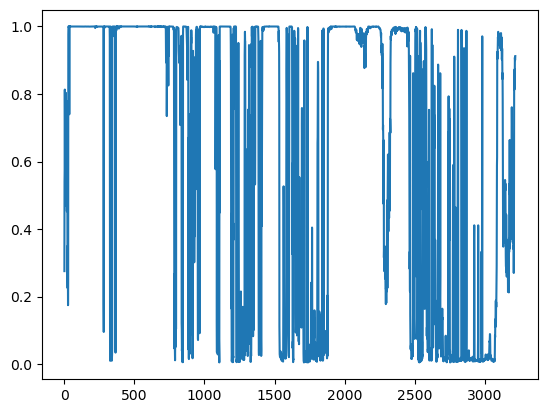

In [216]:
Cricket_p=data['TOP1_pts'].sel(point_loc='Cricket1_likelihood').data
print(Cricket_p)


plt.plot(Cricket_p)
plt.show()

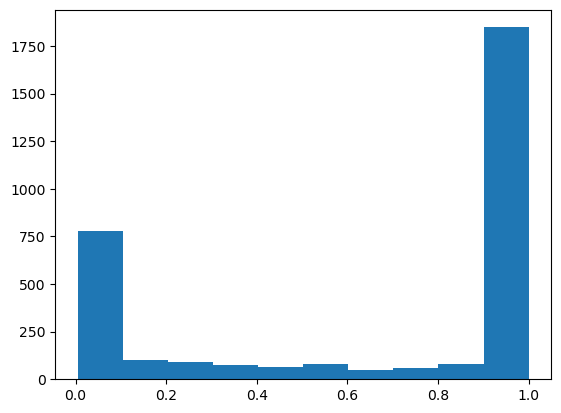

In [6]:
plt.hist(Cricket_p[~np.isnan(Cricket_x)])
plt.show()

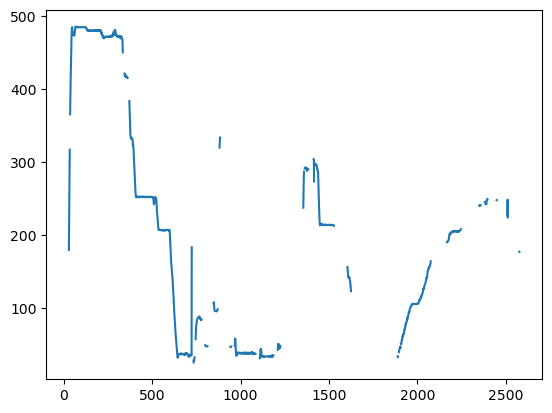

In [246]:
thresh=0.995
crick_x_thresh = Cricket_x.copy()
crick_x_thresh[Cricket_p < thresh] = np.nan
crick_x_thresh

crick_y_thresh = Cricket_y.copy()
crick_y_thresh[Cricket_p < thresh] = np.nan
crick_y_thresh

plt.plot(crick_y_thresh)
# plt.plot(mouse_xy[0], mouse_xy[1])
plt.show()

distance calculations and plotting

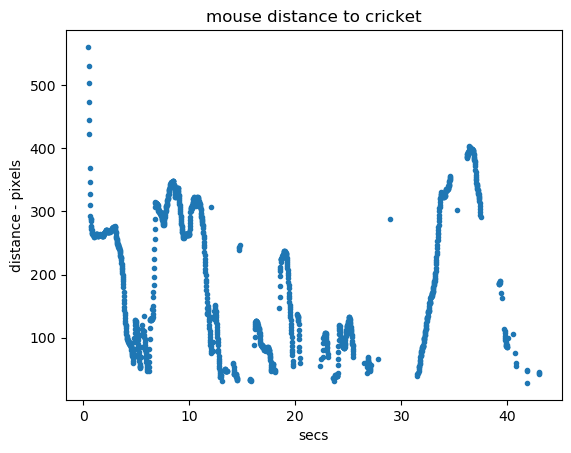

In [247]:
plotter = 1
t = timestamps-timestamps[0]

dist = np.sqrt( np.square(crick_x_thresh - mouse_xy[0]) + np.square(crick_y_thresh - mouse_xy[1]))
#interpolate to fill nans in range calculation

if plotter==1:
    plt.plot(t, dist,'.')
    plt.title('mouse distance to cricket')
    plt.xlabel('secs')
    plt.ylabel('distance - pixels')
plt.show()

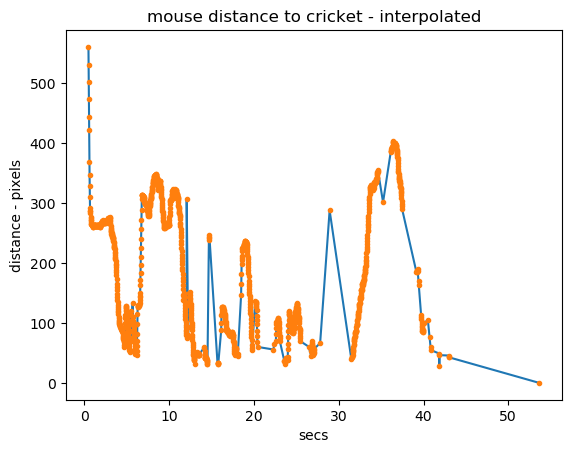

In [259]:
ind = np.arange(0,len(dist))
dist[-1]=0; # range must be 0 at end by definittion, so this allows interpolation
interp = interpolate.interp1d(ind[~np.isnan(dist)], dist[~np.isnan(dist)],bounds_error=False, fill_value=np.nan ) #cmn - set fill value to 0 since range showld go to zero at end; this might do something funny if there's nan's at start, but let's deal with that later
range_interp = interp(ind)
range_interp

plt.plot(t, range_interp)
plt.plot(t,dist,'.')
plt.title('mouse distance to cricket - interpolated')
plt.xlabel('secs')
plt.ylabel('distance - pixels')
plt.show()

speed calculations and plotting

In [260]:
win = 12
dx=np.diff(mouse_xy[0])
dx=np.convolve(dx,np.ones(win)/win, 'same')

dy=np.diff(mouse_xy[1])
dy=np.convolve(dy,np.ones(win)/win, 'same')

spd=np.sqrt(np.square(dx)+np.square(dy))


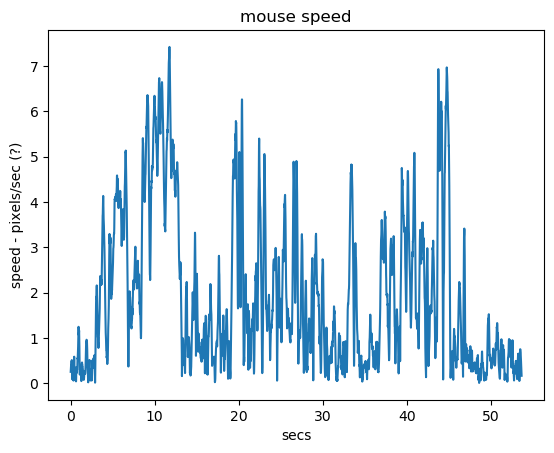

In [261]:
plt.plot(t[0:-1],spd)
plt.title('mouse speed')
plt.xlabel('secs')
plt.ylabel('speed - pixels/sec (?)')
plt.show()

time to capture calculations

In [262]:
Cricket_xy=[crick_x_thresh, crick_y_thresh]
Cricket_xy
#currently not the best, think there is a tradeoff between having the thresh low enough that speed and range look better and getting the exact time to capture
captureT= np.max(np.where(~np.isnan(Cricket_xy[0])))/framerate
movieT=len(Cricket_p)/framerate
if captureT.size==0:
    captureT=movieT



In [263]:
captureT

43.0

azimuth calculations and plotting

C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in remainder
  # This is added back by InteractiveShellApp.init_path()


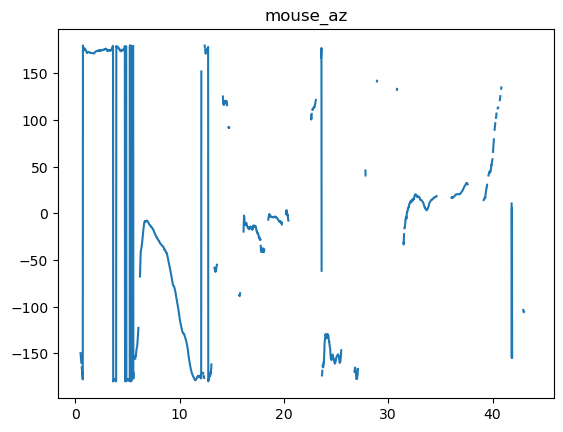

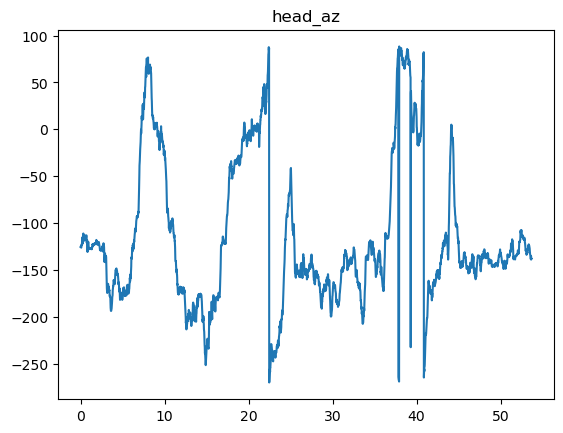

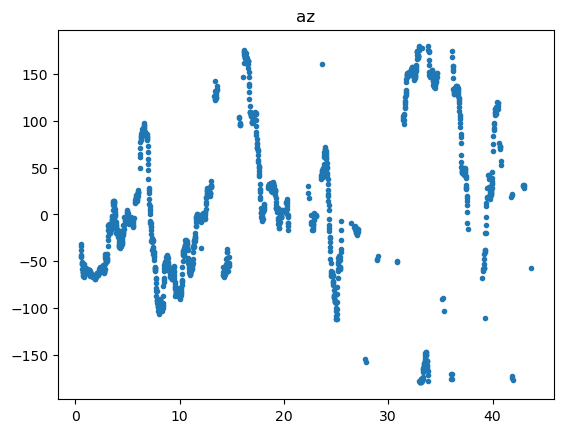

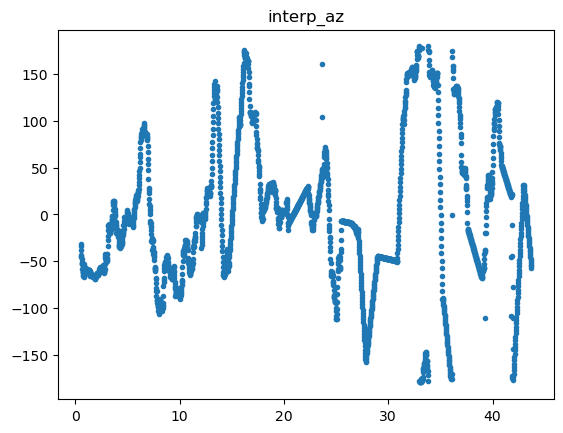

In [480]:
mouse_az = np.arctan2((Cricket_xy[1] - mouse_xy[1]),(Cricket_xy[0] - mouse_xy[0]))*180/np.pi
plt.figure()
plt.plot(t, mouse_az)
plt.title('mouse_az')
head_az = np.arctan2((Rear_xy[1] - Lear_xy[1]),(Rear_xy[0] - Lear_xy[0]))*180/np.pi -90
plt.figure()
plt.plot(t,head_az)
plt.title('head_az')

az = mouse_az-head_az
az = np.mod(az+180,360)-180
plt.figure()
plt.plot(t,az,'.')
plt.title('az')

if np.sum(~np.isnan(az))>0:
    azOld = az
    ind = np.arange(0,len(az))
    interp = interpolate.interp1d(ind[~np.isnan(az)], az[~np.isnan(az)],bounds_error=False, fill_value=np.nan )
    az=interp(ind)
plt.figure()
plt.plot( t,az,'.')
plt.title('interp_az')



plt.show()

# ind = np.arange(0,len(mouse_az))
# interp = interpolate.interp1d(ind[~np.isnan(mouse_az)], mouse_az[~np.isnan(mouse_az)],bounds_error=False, fill_value=(5,570) )
# az_interp = interp(ind)

# plt.plot(t,az_interp)
# plt.show()

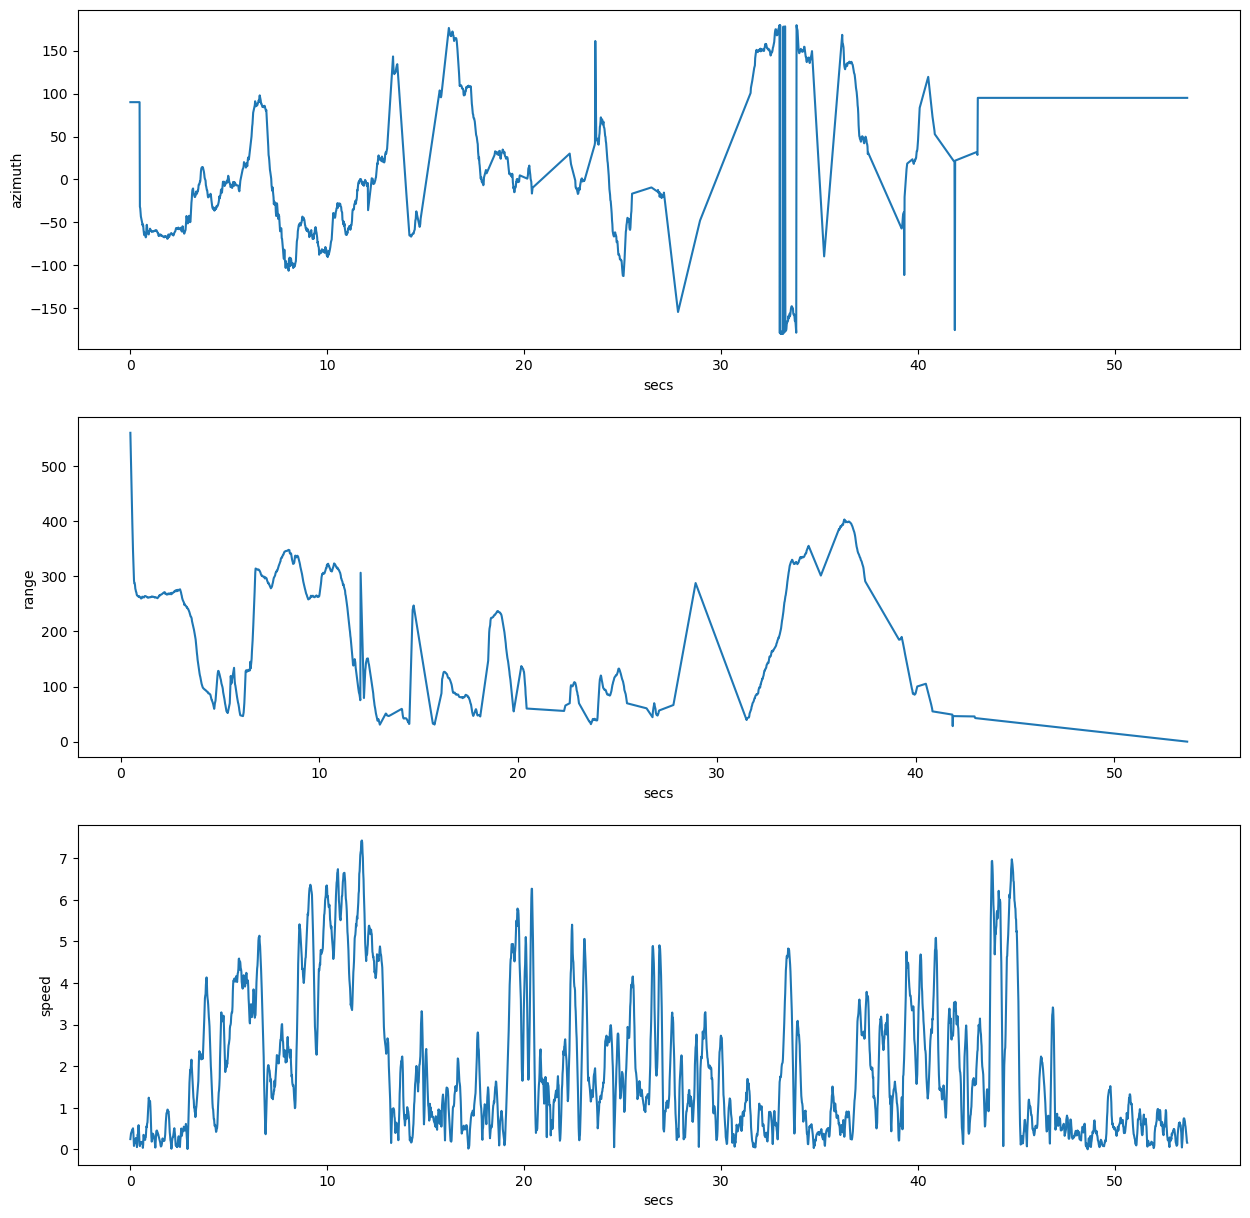

In [265]:
fig  = plt.figure(figsize = [15,15])
ax = fig.add_subplot(311)
ax1 = fig.add_subplot(312)
ax2=fig.add_subplot(313)
ax.plot(t, az)
ax.set_ylabel('azimuth')
ax.set_xlabel('secs')
ax1.plot(t, range_interp)
ax1.set_ylabel('range')
ax1.set_xlabel('secs')
ax2.plot(t[0:-1], spd)
ax2.set_ylabel('speed')
ax2.set_xlabel('secs')
plt.show()



# fig  = plt.figure(figsize = [18,5])
# ax = fig.add_subplot(131)
# ax1 = fig.add_subplot(132)
# ax2 = fig.add_subplot(133)

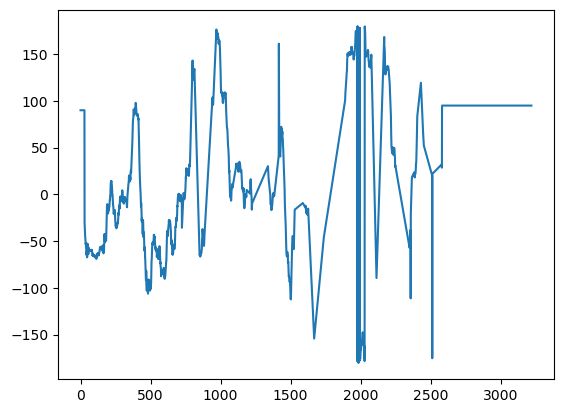

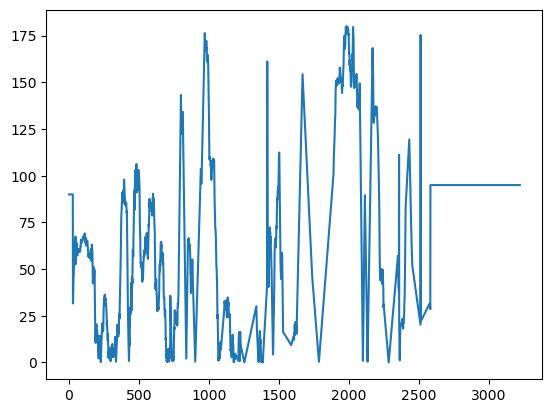

In [266]:
plt.close('all')
plt.plot(az)
plt.show()
plt.plot(np.abs(az))
plt.show()

figure out where the approaches and intercepts are

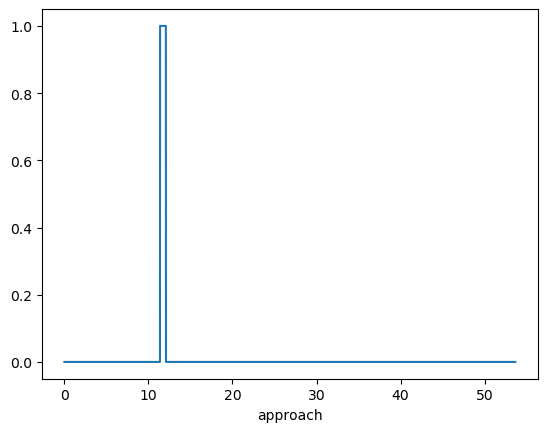

In [271]:

approach = []
paired = list(zip(az,spd))
for pair in paired:
    if np.abs(pair[0]) < 30 and pair[1] > 5:
        approach.append(1)
    else:
        approach.append(0)

approach=signal.medfilt(approach, 31)

approach=np.asarray(approach)

approachStarts=np.where(np.diff(approach)>0)
approachEnds=np.where(np.diff(approach)<0)
firstApproach=np.min(approachStarts)
plt.plot(t[:-1],approach)
plt.xlabel('approach')
plt.show()


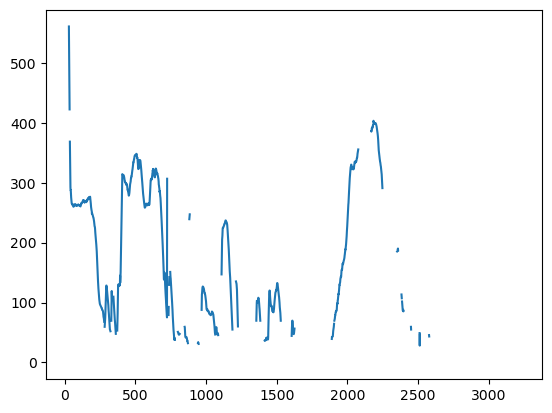

In [268]:
plt.plot(dist)
plt.show()

In [500]:
#find instances of intercept given an approach (end of approach range <2cm); index dist using approachEnds, if range value <2, then call an intercept
intercept=[]
maybeIntercept=np.take(dist, approachEnds)
maybeIntercept=maybeIntercept[0]
for i in maybeIntercept:
    if i<3:
        intercept.append(1)
    else:
        intercept.append(0)
print(approachEnds)
print(maybeIntercept)
print(intercept)
#calculate probability of intercept given approach
tot_approach=np.size(approachEnds)
tot_intercept=sum(intercept)
prob_inter=tot_intercept/tot_approach
print(prob_inter)

#calculate the probability of capture given contact - 1/number of intercepts
prob_capture=1/tot_intercept
print(prob_capture)

(array([ 248,  363,  443,  779, 1270, 1404, 1621, 2268, 2384, 2509, 2602],
      dtype=int64),)
[ 6.74160575  2.94681538 20.0312098   2.61113613 10.87726361  2.95790766
  3.32803342 10.66105714  7.38888887  7.04508198  7.58740819]
[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
0.2727272727272727
0.3333333333333333


In [501]:
dist[approachEnds]

array([ 6.74160575,  2.94681538, 20.0312098 ,  2.61113613, 10.87726361,
        2.95790766,  3.32803342, 10.66105714,  7.38888887,  7.04508198,
        7.58740819])

In [147]:
print(np.size(spd))
print(np.size(az))
print(np.size(dist))

3219
3220
3220


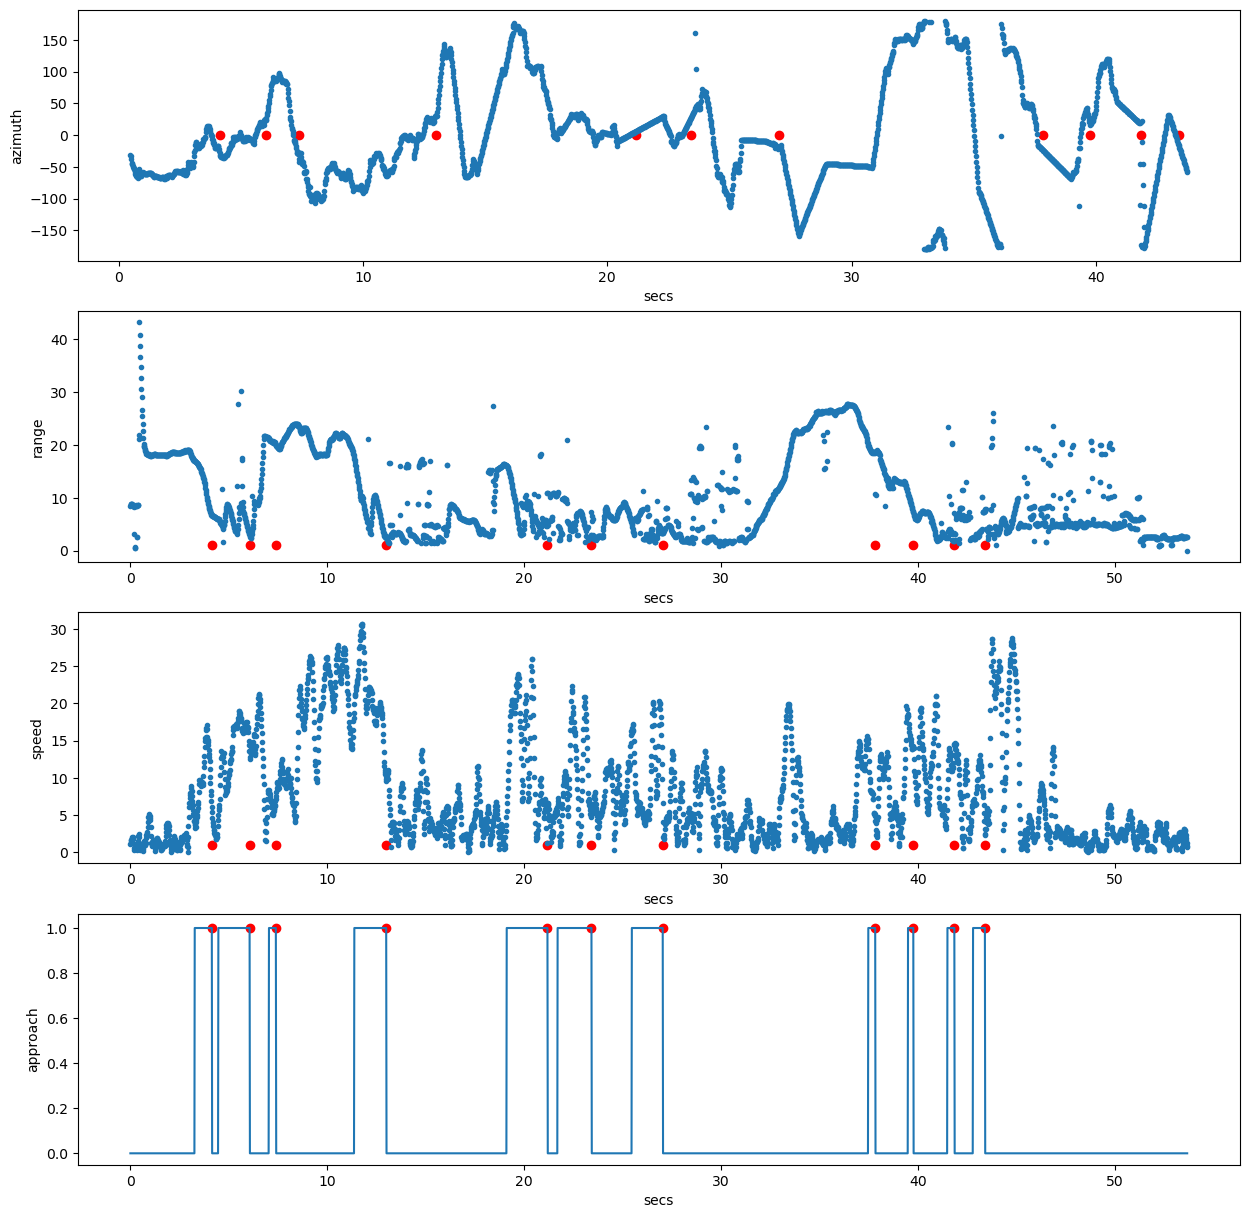

In [502]:
plt.close('all')
fig  = plt.figure(figsize = [15,15])
ax = fig.add_subplot(411)
ax1 = fig.add_subplot(412)
ax2=fig.add_subplot(413)
ax3=fig.add_subplot(414)
ax.plot(t, az,'.')
ax.scatter(np.take(t,approachEnds),np.ones((1,len(approachEnds[0]))),color='r')
ax.set_ylabel('azimuth')
ax.set_xlabel('secs')
ax1.plot(t, dist,'.')
ax1.scatter(np.take(t,approachEnds),np.ones((1,len(approachEnds[0]))),color='r')
ax1.set_ylabel('range')
ax1.set_xlabel('secs')
ax2.plot(t[0:-1], spd,'.')
ax2.scatter(np.take(t,approachEnds),np.ones((1,len(approachEnds[0]))),color='r')
ax2.set_ylabel('speed')
ax2.set_xlabel('secs')
ax3.plot(t[0:-1], approach)
ax3.scatter(np.take(t,approachEnds),np.ones((1,len(approachEnds[0]))),color='r')
ax3.set_ylabel('approach')
ax3.set_xlabel('secs')
plt.show()


In [200]:
print(np.take(t,approachEnds))

[[ 4.134439  6.0688    7.385511 12.987251 20.75657  23.257971 27.025395
  27.609613 39.762957 41.530035 41.696653 43.380595]]


In [202]:
print(np.ones((1,len(approachEnds[0]))))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


work on smoothing the TTL - still need to figure out how to line up with camera data

In [57]:
file='T:/OptoPreyCapture/050721/PVCH13p3RT/trial_3/050721_PVCH13p3RT_laser_on_Rig2_trial_3_imu.nc'

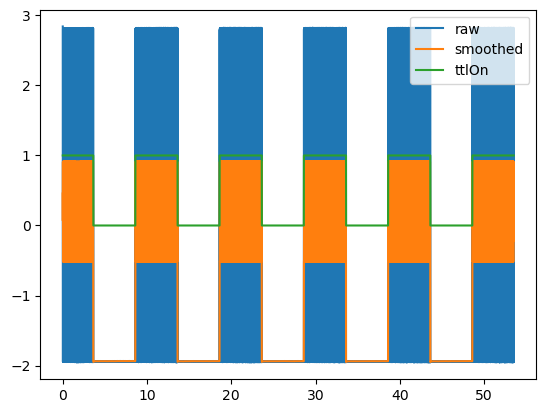

In [86]:
plt.close('all')
# load data
imu_file = file
imu_data = xr.open_dataset(imu_file)
acc_chans = imu_data.IMU_data
ttl = np.array(acc_chans.sel(channel='acc_x'))
ttlT = np.asarray(imu_data.timestamps-timestamps[0])
# smooth and threshold
win = 10;
ttlSmooth = np.convolve(ttl,np.ones(win)/win,'same')
ttlOn = ttlSmooth>-1;
plt.plot(ttlT-ttlT[0],ttl, label = 'raw')
plt.plot(ttlT-ttlT[0],ttlSmooth, label = 'smoothed')
plt.plot(ttlT-ttlT[0],ttlOn, label = 'ttlOn')
plt.legend()
plt.show()
# interplolate
topT=t
ttlInterp = interpolate.interp1d(ttlT,ttlOn,'nearest', bounds_error = False)
ttlTop = ttlInterp(topT)  ### topT should be whatever you variable is for the timestamps of topdown camera

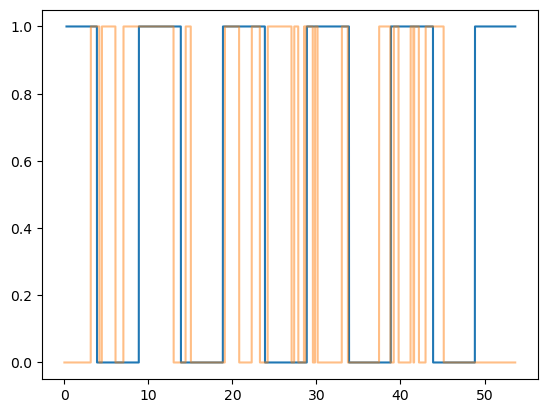

In [90]:
plt.plot(t,ttlTop)
plt.plot(t[0:-1], approach, alpha=0.5)
plt.show()

In [76]:
print(t[0:10])

[0.       0.016679 0.034048 0.049959 0.066355 0.08329  0.099968 0.116634
 0.132877 0.149594]


In [77]:
print(ttlT[0:10])

<xarray.DataArray 'timestamps' (sample: 10)>
array([0.247194  , 0.25052733, 0.25386067, 0.257194  , 0.26052733,
       0.26386067, 0.267194  , 0.27052733, 0.27386067, 0.277194  ])
Coordinates:
  * sample      (sample) int64 0 100 200 300 400 500 600 700 800 900
    timestamps  (sample) float64 5.773e+04 5.773e+04 ... 5.773e+04 5.773e+04


In [55]:
imu_data

<xarray.Dataset>
Dimensions:     (frame: 3220, height: 135, point_loc: 39, width: 180)
Coordinates:
  * frame       (frame) int64 0 1 2 3 4 5 6 ... 3214 3215 3216 3217 3218 3219
  * point_loc   (point_loc) object 'Nose_x' ... 'BottomLeftCorner_likelihood'
    timestamps  (frame) float64 ...
    trial       object ...
Dimensions without coordinates: height, width
Data variables:
    TOP1_pts    (point_loc, frame) float64 ...
    TOP1_video  (frame, height, width) int8 ...

### Define function to calculate probabilities, time to capture, and frequency of approach. Can also create rough trajectory, speed, range and azimuth plots for data visualization

In [132]:
def calculations(f, plotter = False):
    '''
    function to do calculations on mouse and cricket DLC data
    
    INPUTS
        f : string
            filename of data file
        plotter : boolean
            whether or not to plot data
            
    RETURNS
        capturet : int
            time mouse captures cricket
        timetoapproach: int
            latency to first approach 
        freqapproach: int
            frequency mouse approaches cricket, fraction of total time
        prob_inter: int
            probability mouse intercepts cricket given approach
        prob_capture: int
            probability of capture given interception
    '''
    pixpercm = 14.5
    thresh = 0.99
    framerate = 60
    # load all of data in file
    data = xr.open_dataset(f)

    # load DLC points for mouse
    Cricket_p = data['TOP1_pts'].sel(point_loc='Cricket1_likelihood').data
    Rear_x = data['TOP1_pts'].sel(point_loc='Rear_x').data/pixpercm
    Rear_y = data['TOP1_pts'].sel(point_loc='Rear_y').data/pixpercm
    Rear_xy=np.asarray([Rear_x, Rear_y])
    Lear_x = data['TOP1_pts'].sel(point_loc='Lear_x').data/pixpercm
    Lear_y = data['TOP1_pts'].sel(point_loc='Lear_y').data/pixpercm
    Lear_xy=np.asarray([Lear_x, Lear_y])
    mouse_xy=0.5*(Rear_xy+Lear_xy)
    
    # load DLC points for cricket
    Cricket_x = (data['TOP1_pts'].sel(point_loc='Cricket1_x').data+data['TOP1_pts'].sel(point_loc='Cricket2_x').data)/2
    Cricket_y = (data['TOP1_pts'].sel(point_loc='Cricket1_y').data+data['TOP1_pts'].sel(point_loc='Cricket2_y').data)/2
    Cricket_x=Cricket_x/pixpercm
    Cricket_y=Cricket_y/pixpercm
    crick_x_thresh = Cricket_x.copy()
    crick_x_thresh[Cricket_p < thresh] = np.nan
    crick_y_thresh = Cricket_y.copy()
    crick_y_thresh[Cricket_p < thresh] = np.nan
    Cricket_xy=[crick_x_thresh, crick_y_thresh]
    
#     plt.figure()
#     plt.plot(crick_x_thresh,'.')
#     plt.plot(crick_y_thresh,'.')
#     plt.xlabel('cricket threshold position')  

    #interpolate values to fill NaNs
    ind = np.arange(0,len(crick_x_thresh))
    interp = interpolate.interp1d(ind[~np.isnan(crick_x_thresh)], crick_x_thresh[~np.isnan(crick_x_thresh)],bounds_error=False, fill_value=np.nan )
    cricket_x_interp = interp(ind)

    ind = np.arange(0,len(crick_y_thresh))
    interp = interpolate.interp1d(ind[~np.isnan(crick_y_thresh)], crick_y_thresh[~np.isnan(crick_y_thresh)],bounds_error=False, fill_value=np.nan)
    cricket_y_interp = interp(ind)
    
    #plot trajectories of mouse and cricket
    if plotter == True:
        plt.figure()
        plt.plot(mouse_xy[0], mouse_xy[1], alpha=0.75)
        plt.plot(cricket_x_interp, cricket_y_interp, alpha=0.75)
        plt.scatter(cricket_x_interp[0], cricket_y_interp[0], color='g')
        plt.scatter(cricket_x_interp[-1], cricket_y_interp[-1], color='r')
        plt.scatter(mouse_xy[0][0], mouse_xy[1][0], color='g')
        plt.scatter(mouse_xy[0][-1], mouse_xy[1][-1], color='r')
        plt.title('{}'.format(f))
        plt.show()
        
    #calculate time to capture, currently not the best, think there is a tradeoff between having the thresh low enough that speed and range look better and getting the exact time to capture
    Cricket_xy = [crick_x_thresh, crick_y_thresh]
    captureT = np.max(np.where(~np.isnan(Cricket_xy[0])))/framerate # return this
    movieT = len(Cricket_p)/framerate
    if captureT.size==0:
        captureT = movieT
    
    # calculate and plot distance between mouse and cricket
    timestamps = np.asarray(data['timestamps'])
    t = timestamps-timestamps[0]
    dist = np.sqrt(np.square(crick_x_thresh- mouse_xy[0]) + np.square(crick_y_thresh - mouse_xy[1])) #cmn - changes to cricket_x instead of interp.
    dist[-1] = 0  # we know that last point should be 0 range, since it's capture
    
    # more interpolation!!!
    ind = np.arange(0,len(dist))
    interp = interpolate.interp1d(ind[~np.isnan(dist)], dist[~np.isnan(dist)],bounds_error=False, fill_value=np.nan )
    range_interp = interp(ind)
    dist = range_interp
    
    if plotter==1:
        plt.figure()
        plt.plot(t, dist)
        plt.title('Mouse Distance to Cricket')
        plt.xlabel('Time - secs')
        plt.ylabel('Distance - cm')
        plt.show()
        
    # calculate mouse speed
    win = 12
    dx = np.diff(mouse_xy[0])
    dx = np.convolve(dx,np.ones(win)/win, 'same')
    dy = np.diff(mouse_xy[1])
    dy = np.convolve(dy,np.ones(win)/win, 'same')
    spd = (np.sqrt(np.square(dx)+np.square(dy)))*framerate
    
    if plotter == True:
        plt.plot(t[0:-1],spd)
        plt.title('Mouse Speed')
        plt.xlabel('Time - secs')
        plt.ylabel('Speed - cm/sec')
        plt.show()

    # calculate azimuth 
    mouse_az = np.arctan2((Cricket_xy[1] - mouse_xy[1]),(Cricket_xy[0] - mouse_xy[0]))*180/np.pi
    head_az = np.arctan2((Rear_xy[1] - Lear_xy[1]),(Rear_xy[0] - Lear_xy[0]))*180/np.pi -90
    az = mouse_az-head_az
    az = np.mod(az+180,360)-180
    if np.sum(~np.isnan(az))>0:
        azOld = az
        ind = np.arange(0,len(az))
        interp = interpolate.interp1d(ind[~np.isnan(az)], az[~np.isnan(az)],bounds_error=False, fill_value=np.nan )
        az = interp(ind)
    
    if plotter == True:
        plt.figure()
        plt.plot( t,az)
        plt.title('azimuth')
        
    # plot range, azimuth and speed on the same plot
    if plotter == True: 
        fig  = plt.figure(figsize = [15,15])
        ax = fig.add_subplot(311)
        ax1 = fig.add_subplot(312)
        ax2=fig.add_subplot(313)
        ax.plot(t, az)
        ax.set_ylabel('Azimuth - degrees')
        ax.set_xlabel('Time -secs')
        ax1.plot(t, dist)
        ax1.set_ylabel('Range - cm')
        ax1.set_xlabel('Time - secs')
        ax2.plot(t[0:-1], spd)
        ax2.set_ylabel('Speed - cm/sec')
        ax2.set_xlabel('Time - secs')
        plt.show()
        
    # find the start and end of each approach
    approach = []
    paired = list(zip(az,spd))
    for pair in paired:
        if np.abs(pair[0]) < 30 and pair[1] > 5:
            approach.append(1)
        else:
            approach.append(0)

    approach = signal.medfilt(approach, 31) # 31 is hardcoded half a second based on framerate
    approach = np.asarray(approach)

    approachStarts = np.where(np.diff(approach)>0)
    approachEnds = np.where(np.diff(approach)<0)
    firstApproach = np.min(approachStarts)
    timetoapproach = t[firstApproach] # return this
    freqapproach=np.size(approachStarts) / movieT # return this
    
    # find instances of intercept given an approach (end of approach range <2cm); index dist using approachEnds, if range value <2, then call an intercept
    intercept = []
    maybeIntercept = np.take(dist, approachEnds) # uses approachEnds to index dist
    maybeIntercept = maybeIntercept[0] # np.take returns tuple, first value are the ones you one
    maybeIntercept[-1] = 0 # assuming last approach is intercept/capture, makes things werk
    
    for i in maybeIntercept:
        if i < 5:
            intercept.append(1)
        else:
            intercept.append(0)

    # calculate probability of intercept given approach
    tot_approach = np.size(approachEnds)
    tot_intercept = sum(intercept)
    prob_inter = tot_intercept / tot_approach
    
    # calculate the probability of capture given contact - 1/number of intercepts
    if tot_intercept>0:
        prob_capture = 1 / tot_intercept
    else:
        print('no capture')
    
    return captureT, timetoapproach, freqapproach, prob_inter, prob_capture

In [133]:
#lines to make lists of values and append to dataframe csv2
all_captureT = []
all_timetoapproach = []
all_freqapproach = []
all_prob_inter = []
all_prob_capture = []

for ind, row in csv3.iterrows(): # files is a list of all filenames you want to look at (preferably full paths)
#     print(ind)
    topfile=glob.glob((os.path.normpath(os.path.join(row['drive']+':/','OptoPreyCapture',row['experiment_date'],row['animal_name'],'trial_{:d}'.format(row['Trial']),'*TOP1.nc'))))[0]# Top nc file
#     print(topfile)
    try:
        captureT, timetoapproach, freqapproach, prob_inter, prob_capture = calculations(topfile)
        all_captureT.append(captureT)
        all_timetoapproach.append(timetoapproach)
        all_freqapproach.append(freqapproach)
        all_prob_inter.append(prob_inter)
        all_prob_capture.append(prob_capture)
    except: 
        all_captureT.append(np.nan)
        all_timetoapproach.append(np.nan)
        all_freqapproach.append(np.nan)
        all_prob_inter.append(np.nan)
        all_prob_capture.append(np.nan)

csv3['captureT'] = all_captureT
csv3['timetoapproach'] = all_timetoapproach
csv3['freqapproach'] = all_freqapproach
csv3['prob_inter'] = all_prob_inter
csv3['prob_capture'] = all_prob_capture

C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:122: RuntimeWarning: invalid value encountered in remainder


In [26]:

print(labels)
csv2[(csv2['Wallpaper']==labels[0]) & (csv2['LaserOn']==False)].reset_index()


Index(['white wallpaper', 'low sf', 'high sf', '"high sf" legos',
       ' "low sf" legos', 'low sf ', 'high sf ', ' "high sf" legos'],
      dtype='object')


index experiment_date animal_name experiment_outcome computer drive  \
0       1          042721   PVCH12p10               good   kraken     T   
1       3          042721   PVCH12p10               good   kraken     T   
2       6          042721  PVCH12p11a               good   kraken     T   
3       7          042721  PVCH12p11a               good   kraken     T   
4       8          042721  PVCH12p11b               good   kraken     T   
5      10          042721  PVCH12p11b               good   kraken     T   
6      12          042721  PVCH13p3RT               good   kraken     T   
7      13          042721  PVCH13p3RT               good   kraken     T   
8      50          043021   PVCH12p10               good   kraken     T   
9      51          043021   PVCH12p10               good   kraken     T   
10     53          043021  PVCH12p11a               good   kraken     T   
11     54          043021  PVCH12p11a               good   kraken     T   
12     56          043021  PVCH12p11b               good   kraken     T   
13     59          043021  PVCH12p11b               good   kraken     T   
14     60          043021  PVCH13p3RT               good   kraken     T   
15     62          043021  PVCH13p3RT               good   kraken     T   
16     96          050521   PVCH12p10               good   kraken     T   
17     98          050521   PVCH12p10               good   kraken     T   
18    100          050521  PVCH12p11a               good   kraken     T   
19    103          050521  PVCH12p11a               good   kraken     T   
20    106          050521  PVCH12p11b               good   kraken     T   
21    107          050521  PVCH12p11b               good   kraken     T   
22    108          050521  PVCH13p3RT               good   kraken     T   
23    109          050521  PVCH13p3RT               good   kraken     T   
24    225          042721       CH2p4               good   kraken     T   
25    226          042721       CH2p4               good   kraken     T   
26    228          042721      CH2p10               good   kraken     T   
27    231          042721      CH2p10               good   kraken     T   
28    248          043021       CH2p4               good   kraken     T   
29    249          043021       CH2p4               good   kraken     T   
30    253          043021      CH2p10               good   kraken     T   
31    255          043021      CH2p10               good   kraken     T   
32    273          050521       CH2p4               good   kraken     T   
33    275          050521       CH2p4               good   kraken     T   
34    277          050521      CH2p10               good   kraken     T   
35    278          050521      CH2p10               good   kraken     T   
36    279          050521      CH2p10               good   kraken     T   

   run_preprocessing run_ephys_analysis load_for_data_pool animal_dirpath  \
0               True              False              False            NaN   
1               True              False              False            NaN   
2               True              False              False            NaN   
3               True              False              False            NaN   
4               True              False              False            NaN   
5               True              False              False            NaN   
6               True              False              False            NaN   
7               True              False              False            NaN   
8               True              False              False            NaN   
9               True              False              False            NaN   
10              True              False              False            NaN   
11              True              False              False            NaN   
12              True              False              False            NaN   
13              True              False              False            NaN  

In [42]:
test=csv2
test= test.drop([295])

In [130]:
test=csv3[csv3['animal_name'].str.contains('PVCH12p11a')]
test=test[test['experiment_date'].astype(str).str.contains('061021')]

test

experiment_date animal_name experiment_outcome     computer drive  \
424          061021  PVCH12p11a               good  new-monster     T   
425          061021  PVCH12p11a               good  new-monster     T   
426          061021  PVCH12p11a               good  new-monster     T   
427          061021  PVCH12p11a               good  new-monster     T   

    run_preprocessing run_ephys_analysis load_for_data_pool animal_dirpath  \
424              True              False              False            NaN   
425              True              False              False            NaN   
426              True              False              False            NaN   
427              True              False              False            NaN   

                        Wallpaper Trial LaserOn  
424  6-2x2 legos, high sf, fibers     1   False  
425  6-2x2 legos, high sf, fibers     2    True  
426  6-2x2 legos, high sf, fibers     3   False  
427  6-2x2 legos, high sf, fibers     4   False

In [10]:
labels
    

Index(['white wallpaper', 'low sf', 'high sf', '"high sf" legos',
       ' "low sf" legos'],
      dtype='object')

# Batch Analysis

In [126]:
csv_filepath = 'T:/OptoPreyCapture/Optogentics_PreyCapture2021.csv'

In [127]:
# Read in CSV file containing meta data
print('opening csv file')
csv = pd.read_csv(csv_filepath)
csv['experiment_date'] = pd.to_datetime(csv['experiment_date'],infer_datetime_format=True,format='%m%d%Y').dt.strftime('%m%d%y')
csv = csv.loc[(csv['run_preprocessing'] == True)|(csv['run_ephys_analysis'] == True)]
# filter out rows of the csv that are marked to be analyzed with preprocessing and ephys analysis (these should be seperate columns in the df)
run_preproc = csv.loc[csv['run_preprocessing'] == 'TRUE']
run_ephys = csv.loc[csv['run_ephys_analysis'] == 'TRUE']

csv = csv[csv['experiment_outcome']=='good'].reset_index(drop=True)
# csv2 = csv.copy()

opening csv file


In [128]:
# Format Pandas Dataframe to have Trial number and Stimulus condition
# TOP1_LaserOn, TOP1_Laseroff, IMU_LaserOn, IMU_Laseroff= [], [], [], []
cols = list(csv.keys()[:-4])
cols.append('Trial')
cols.append('LaserOn')
csv2 = pd.DataFrame(columns=cols)
for ind,row in csv.iterrows():
    for n in range(1,5):
        if '*' in row['trial_{:d}'.format(n)]:
            csv2 = csv2.append(row[:-4].append(pd.Series([n,True],index=['Trial','LaserOn'])),ignore_index=True)
#             TOP1_LaserOn.append(glob.glob((os.path.normpath(os.path.join(row['drive']+':/','OptoPreyCapture',row['experiment_date'],row['animal_name'],f'trial_{n}','*TOP1.nc'))))[0])
#             IMU_LaserOn.append(glob.glob((os.path.normpath(os.path.join(row['drive']+':/','OptoPreyCapture',row['experiment_date'],row['animal_name'],f'trial_{n}','*imu.nc'))))[0])
        else:
#             TOP1_Laseroff.append(glob.glob((os.path.normpath(os.path.join(row['drive']+':/','OptoPreyCapture',row['experiment_date'],row['animal_name'],f'trial_{n}','*TOP1.nc'))))[0])
#             IMU_Laseroff.append(glob.glob((os.path.normpath(os.path.join(row['drive']+':/','OptoPreyCapture',row['experiment_date'],row['animal_name'],f'trial_{n}','*imu.nc'))))[0])
            csv2 = csv2.append(row[:-4].append(pd.Series([n,False],index=['Trial','LaserOn'])),ignore_index=True)
inds, labels = csv2['Wallpaper'].factorize()

In [131]:
csv3=csv2.drop([295,330,331,427])
csv3

experiment_date animal_name experiment_outcome     computer drive  \
0            042721   PVCH12p10               good  new-monster     T   
1            042721   PVCH12p10               good  new-monster     T   
2            042721   PVCH12p10               good  new-monster     T   
3            042721   PVCH12p10               good  new-monster     T   
4            042721  PVCH12p11a               good  new-monster     T   
..              ...         ...                ...          ...   ...   
719          061521       CH2p4               good  new-monster     T   
720          061521      CH2p10               good  new-monster     T   
721          061521      CH2p10               good  new-monster     T   
722          061521      CH2p10               good  new-monster     T   
723          061521      CH2p10               good  new-monster     T   

    run_preprocessing run_ephys_analysis load_for_data_pool animal_dirpath  \
0                True              False              False            NaN   
1                True              False              False            NaN   
2                True              False              False            NaN   
3                True              False              False            NaN   
4                True              False              False            NaN   
..                ...                ...                ...            ...   
719              True              False              False            NaN   
720              True              False              False            NaN   
721              True              False              False            NaN   
722              True              False              False            NaN   
723              True              False              False            NaN   

                                Wallpaper Trial LaserOn  
0                         white wallpaper     1    True  
1                         white wallpaper     2   False  
2                         white wallpaper     3    True  
3                         white wallpaper     4   False  
4                         white wallpaper     1    True  
..                                    ...   ...     ...  
719  6-2x2 legos, white wallpaper, fibers     4   False  
720  6-2x2 legos, white wallpaper, fibers     1    True  
721  6-2x2 legos, white wallpaper, fibers     2    True  
722  6-2x2 legos, white wallpaper, fibers     3   False  
723  6-2x2 legos, white wallpaper, fibers     4   False  

[720 rows x 12 columns]

In [150]:
test1=csv3[csv3['animal_name'].str.contains('PV')]
test1=test1[~test1['Wallpaper'].str.contains('fibers')]
# test1=test1[test1['Trial'].astype(str).str.contains('1|2')]
# test1

In [246]:
test1=csv3[~csv3['animal_name'].str.contains('PV')]
test1=test1[test1['Wallpaper'].str.contains('fibers')]
# test1=test1[test1['Trial'].astype(str).str.contains('1|2')]
plt.close('all')
ax,fig=plt.subplots(1,1)
sns.barplot(x='Wallpaper', y='captureT', hue='LaserOn', data=test1, ci=68)
plt.title('Time to Capture - CHR mice')
plt.ylabel('Time (sec)')
plt.xlabel('Arena Condition')
plt.xticks(rotation = 'vertical')
sns.despine()
plt.savefig('T:\OptoPreyCapture\Figures\CHtime2cap_fibers1.pdf', bbox_inches="tight")

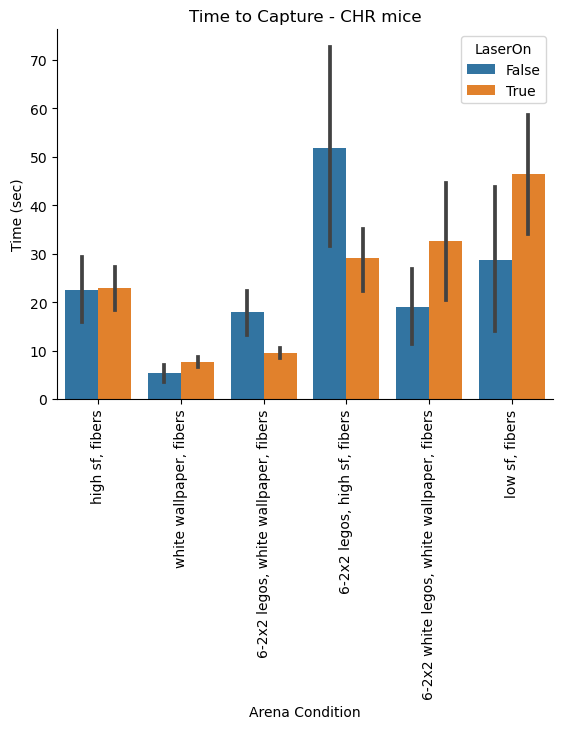

In [247]:
plt.show()

In [162]:
plt.close('all')

In [201]:
test2=csv3[~csv3['animal_name'].str.contains('PV')]
test2=test2[test2['Wallpaper'].str.contains('fibers')]
test2=test2[test2['Trial'].astype(str).str.contains('1|2')]

ax,fig=plt.subplots(1,1)
sns.barplot(x='Wallpaper', y='prob_capture', hue='LaserOn', data=test2, ci=68)
plt.title('Probabililty of Capture - CHR mice (Trials 1 & 2)')
plt.ylabel('p(Capture|Intercept)')
plt.xlabel('Arena Condition')
plt.xticks(rotation = 'vertical')
sns.despine()
plt.savefig('T:\OptoPreyCapture\Figures\CHprobcap_fiberonly_trials1_2.pdf')

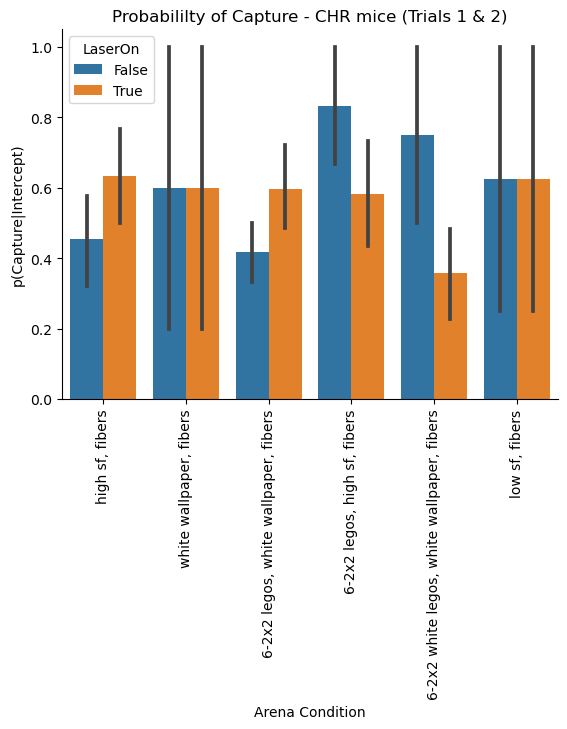

In [202]:
plt.show()

To get all trials given a condition and laser status you can use this example code

In [16]:
# Print example stim condition and laser status.
print(labels)
print('printing: ', labels[0], 'LaserOn=',False)
test=csv2[(csv2['Wallpaper']==labels[0]) & (csv2['LaserOn']==False)].reset_index()
test

Index(['white wallpaper', 'low sf', 'high sf', '"high sf" legos',
       ' "low sf" legos'],
      dtype='object')
printing:  white wallpaper LaserOn= False


index experiment_date animal_name experiment_outcome computer drive  \
0       1          042721   PVCH12p10               good   kraken     T   
1       3          042721   PVCH12p10               good   kraken     T   
2       6          042721  PVCH12p11a               good   kraken     T   
3       7          042721  PVCH12p11a               good   kraken     T   
4       8          042721  PVCH12p11b               good   kraken     T   
5      10          042721  PVCH12p11b               good   kraken     T   
6      12          042721  PVCH13p3RT               good   kraken     T   
7      13          042721  PVCH13p3RT               good   kraken     T   
8      50          043021   PVCH12p10               good   kraken     T   
9      51          043021   PVCH12p10               good   kraken     T   
10     53          043021  PVCH12p11a               good   kraken     T   
11     54          043021  PVCH12p11a               good   kraken     T   
12     56          043021  PVCH12p11b               good   kraken     T   
13     59          043021  PVCH12p11b               good   kraken     T   
14     60          043021  PVCH13p3RT               good   kraken     T   
15     62          043021  PVCH13p3RT               good   kraken     T   
16     96          050521   PVCH12p10               good   kraken     T   
17     98          050521   PVCH12p10               good   kraken     T   
18    100          050521  PVCH12p11a               good   kraken     T   
19    103          050521  PVCH12p11a               good   kraken     T   
20    106          050521  PVCH12p11b               good   kraken     T   
21    107          050521  PVCH12p11b               good   kraken     T   
22    108          050521  PVCH13p3RT               good   kraken     T   
23    109          050521  PVCH13p3RT               good   kraken     T   
24    225          042721       CH2p4               good   kraken     T   
25    226          042721       CH2p4               good   kraken     T   
26    228          042721      CH2p10               good   kraken     T   
27    231          042721      CH2p10               good   kraken     T   
28    248          043021       CH2p4               good   kraken     T   
29    249          043021       CH2p4               good   kraken     T   
30    253          043021      CH2p10               good   kraken     T   
31    255          043021      CH2p10               good   kraken     T   
32    273          050521       CH2p4               good   kraken     T   
33    275          050521       CH2p4               good   kraken     T   
34    277          050521      CH2p10               good   kraken     T   
35    278          050521      CH2p10               good   kraken     T   
36    279          050521      CH2p10               good   kraken     T   

   run_preprocessing run_ephys_analysis load_for_data_pool animal_dirpath  \
0               True              False              False            NaN   
1               True              False              False            NaN   
2               True              False              False            NaN   
3               True              False              False            NaN   
4               True              False              False            NaN   
5               True              False              False            NaN   
6               True              False              False            NaN   
7               True              False              False            NaN   
8               True              False              False            NaN   
9               True              False              False            NaN   
10              True              False              False            NaN   
11              True              False              False            NaN   
12              True              False              False            NaN   
13              True              False              False            NaN  

In [92]:
# To grab the file given the information in a row use this code: 
row = csv3[(csv3['Wallpaper']==labels[0]) & (csv3['LaserOn']==False)].reset_index(drop=True).iloc[0]
topfile=glob.glob((os.path.normpath(os.path.join(row['drive']+':/','OptoPreyCapture',row['experiment_date'],row['animal_name'],f'trial_{n}','*TOP1.nc'))))[0]# Top nc file
imufile=glob.glob((os.path.normpath(os.path.join(row['drive']+':/','OptoPreyCapture',row['experiment_date'],row['animal_name'],f'trial_{n}','*imu.nc'))))[0]# IMU nc File
# captureT, timetoapproach, freqapproach, prob_inter, prob_capture = calculations(topfile, plotter = False)


To loop over this dataframe (csv2) you can use this code:

In [119]:
az, spd, dist, mouse_xy,Cricket_xy,t, movieT=calc_basic_param(topfile)

C:\Users\Niell lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in remainder


In [120]:
captureT, timetoapproach, freqapproach, prob_inter, prob_capture=calc_prob(az, spd, dist, mouse_xy,Cricket_xy,t,movieT)

In [125]:
prob_capture


0.14285714285714285

In [98]:
Cricket_xy

(2, 2876)

In [513]:
for laser in [True,False]:
    for label in labels:
        for ind, row in csv2[(csv2['Wallpaper']==label) & (csv2['LaserOn']==laser)].iterrows():  
            topfile =glob.glob((os.path.normpath(os.path.join(row['drive']+':/','OptoPreyCapture',row['experiment_date'],row['animal_name'],f'trial_{n}','*TOP1.nc'))))[0]
#             imufile =glob.glob((os.path.normpath(os.path.join(row['drive']+':/','OptoPreyCapture',row['experiment_date'],row['animal_name'],f'trial_{n}','*imu.nc'))))[0]
                captureT, timetoapproach, freqapproach, prob_inter, prob_capture = calculations(topfile, plotter = False)
#             imu_data=xr.open_dataset(imufile)

In [118]:
def calc_basic_param (f, pixpercm = 14.5,thresh = 0.99,framerate = 60):
    # load all of data in file
    data = xr.open_dataset(f)

    # load DLC points for mouse
    Cricket_p = data['TOP1_pts'].sel(point_loc='Cricket1_likelihood').data
    Rear_x = data['TOP1_pts'].sel(point_loc='Rear_x').data/pixpercm
    Rear_y = data['TOP1_pts'].sel(point_loc='Rear_y').data/pixpercm
    Rear_xy=np.asarray([Rear_x, Rear_y])
    Lear_x = data['TOP1_pts'].sel(point_loc='Lear_x').data/pixpercm
    Lear_y = data['TOP1_pts'].sel(point_loc='Lear_y').data/pixpercm
    Lear_xy=np.asarray([Lear_x, Lear_y])
    mouse_xy=0.5*(Rear_xy+Lear_xy)
    
    # load DLC points for cricket
    Cricket_x = (data['TOP1_pts'].sel(point_loc='Cricket1_x').data+data['TOP1_pts'].sel(point_loc='Cricket2_x').data)/2
    Cricket_y = (data['TOP1_pts'].sel(point_loc='Cricket1_y').data+data['TOP1_pts'].sel(point_loc='Cricket2_y').data)/2
    Cricket_x=Cricket_x/pixpercm
    Cricket_y=Cricket_y/pixpercm
    crick_x_thresh = Cricket_x.copy()
    crick_x_thresh[Cricket_p < thresh] = np.nan
    crick_y_thresh = Cricket_y.copy()
    crick_y_thresh[Cricket_p < thresh] = np.nan
    Cricket_xy=[crick_x_thresh, crick_y_thresh]
    

    #interpolate values to fill NaNs
    ind = np.arange(0,len(crick_x_thresh))
    interp = interpolate.interp1d(ind[~np.isnan(crick_x_thresh)], crick_x_thresh[~np.isnan(crick_x_thresh)],bounds_error=False, fill_value=np.nan )
    cricket_x_interp = interp(ind)

    ind = np.arange(0,len(crick_y_thresh))
    interp = interpolate.interp1d(ind[~np.isnan(crick_y_thresh)], crick_y_thresh[~np.isnan(crick_y_thresh)],bounds_error=False, fill_value=np.nan)
    cricket_y_interp = interp(ind)
        
    #calculate time to capture, currently not the best, think there is a tradeoff between having the thresh low enough that speed and range look better and getting the exact time to capture
    captureT = np.max(np.where(~np.isnan(Cricket_xy[0])))/framerate # return this
    movieT = len(Cricket_p)/framerate
    if captureT.size==0:
        captureT = movieT
    
    # calculate and plot distance between mouse and cricket
    timestamps = np.asarray(data['timestamps'])
    t = timestamps-timestamps[0]
    dist = np.sqrt(np.square(crick_x_thresh- mouse_xy[0]) + np.square(crick_y_thresh - mouse_xy[1])) #cmn - changes to cricket_x instead of interp.
    dist[-1] = 0  # we know that last point should be 0 range, since it's capture
    
    # more interpolation!!!
    ind = np.arange(0,len(dist))
    interp = interpolate.interp1d(ind[~np.isnan(dist)], dist[~np.isnan(dist)],bounds_error=False, fill_value=np.nan )
    range_interp = interp(ind)
    dist = range_interp
        
    # calculate mouse speed
    win = 12
    dx = np.diff(mouse_xy[0])
    dx = np.convolve(dx,np.ones(win)/win, 'same')
    dy = np.diff(mouse_xy[1])
    dy = np.convolve(dy,np.ones(win)/win, 'same')
    spd = (np.sqrt(np.square(dx)+np.square(dy)))*framerate
    
    # calculate azimuth 
    mouse_az = np.arctan2((Cricket_xy[1] - mouse_xy[1]),(Cricket_xy[0] - mouse_xy[0]))*180/np.pi
    head_az = np.arctan2((Rear_xy[1] - Lear_xy[1]),(Rear_xy[0] - Lear_xy[0]))*180/np.pi -90
    az = mouse_az-head_az
    az = np.mod(az+180,360)-180
    if np.sum(~np.isnan(az))>0:
        azOld = az
        ind = np.arange(0,len(az))
        interp = interpolate.interp1d(ind[~np.isnan(az)], az[~np.isnan(az)],bounds_error=False, fill_value=np.nan )
        az = interp(ind)
    return az, spd, dist, mouse_xy, np.array(Cricket_xy),t, movieT  

In [114]:
def calc_prob (az, spd, dist, mouse_xy, Cricket_xy,t,movieT):
# find the start and end of each approach
    approach = []
    paired = list(zip(az,spd))
    for pair in paired:
        if np.abs(pair[0]) < 30 and pair[1] > 5:
            approach.append(1)
        else:
            approach.append(0)

    approach = signal.medfilt(approach, 31) # 31 is hardcoded half a second based on framerate
    approach = np.asarray(approach)

    approachStarts = np.where(np.diff(approach)>0)
    approachEnds = np.where(np.diff(approach)<0)
    firstApproach = np.min(approachStarts)
    timetoapproach = t[firstApproach] # return this
    freqapproach=np.size(approachStarts) / movieT # return this
    
    # find instances of intercept given an approach (end of approach range <2cm); index dist using approachEnds, if range value <2, then call an intercept
    intercept = []
    maybeIntercept = np.take(dist, approachEnds) # uses approachEnds to index dist
    maybeIntercept = maybeIntercept[0] # np.take returns tuple, first value are the ones you one
    maybeIntercept[-1] = 0 # assuming last approach is intercept/capture, makes things werk
    
    for i in maybeIntercept:
        if i < 5:
            intercept.append(1)
        else:
            intercept.append(0)

    # calculate probability of intercept given approach
    tot_approach = np.size(approachEnds)
    tot_intercept = sum(intercept)
    prob_inter = tot_intercept / tot_approach
    
    # calculate the probability of capture given contact - 1/number of intercepts
    if tot_intercept>0:
        prob_capture = 1 / tot_intercept
    else:
        print('no capture')
    
    return captureT, timetoapproach, freqapproach, prob_inter, prob_capture

<xarray.Dataset>
Dimensions:     (frame: 1330, height: 270, point_loc: 39, width: 360)
Coordinates:
  * frame       (frame) int64 0 1 2 3 4 5 6 ... 1324 1325 1326 1327 1328 1329
  * point_loc   (point_loc) object 'Nose_x' ... 'BottomLeftCorner_likelihood'
    timestamps  (frame) float64 ...
    trial       object ...
Dimensions without coordinates: height, width
Data variables:
    TOP1_pts    (point_loc, frame) float64 ...
    TOP1_video  (frame, height, width) int8 ...

In [347]:
for topfile,imufile in zip(TOP1_LaserOn[:1],IMU_LaserOn[:1]):
    top_data=xr.open_dataset(topfile)
    imu_data=xr.open_dataset(imufile)